# German Traffic Sign Recognition Benchmark (GTSRB) Analysis

## 1. Introduction

### 1.1 Problem Statement

The German Traffic Sign Recognition Benchmark (GTSRB) is a multi-class, single-image classification challenge. The goal of this project is to develop a machine learning model that can accurately classify traffic signs into their respective categories. This task has significant real-world applications in autonomous driving and traffic management systems.

### 1.2 Dataset Background

The GTSRB dataset was introduced at the International Joint Conference on Neural Networks (IJCNN) 2011. It has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

The dataset consists of images of traffic signs, each belonging to one of 43 classes. These classes represent various types of traffic signs, including speed limits, warning signs, and regulatory signs.

## 2. Data Loading and Exploration

### 2.1 Importing Libraries

Let's start by importing the necessary libraries for our analysis:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import warnings

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# For later use in modeling
import tensorflow as tf
from tensorflow import keras
import torch
import torchvision

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)

In [5]:
# Load the Sign Names
sign_names = pd.read_csv('data/Sign Names.csv')
print("Sign Names:")
print(sign_names)
print("\nTotal number of classes:", len(sign_names))

Sign Names:
    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                

In [6]:
# Load the Meta data
meta_data = pd.read_csv('data/Meta.csv')
print("\nMeta Data:")
print(meta_data.head(10))
print("\nTotal number of meta entries:", len(meta_data))


Meta Data:
          Path  ClassId  ShapeId  ColorId SignId
0  Meta/27.png       27        0        0   1.32
1   Meta/0.png        0        1        0   3.29
2   Meta/1.png        1        1        0   3.29
3  Meta/10.png       10        1        0   3.27
4  Meta/11.png       11        0        0   1.22
5  Meta/12.png       12        2        2    2.3
6  Meta/13.png       13        4        0    2.1
7  Meta/14.png       14        3        0    2.2
8  Meta/15.png       15        1        0    3.1
9  Meta/16.png       16        1        0    3.3

Total number of meta entries: 43


In [7]:
# Load Train and Test data (assuming you've provided these files)
train_data = pd.read_csv('data/Train.csv')
test_data = pd.read_csv('data/Test.csv')

In [8]:
print("\nTrain Data:")
train_data.head()


Train Data:


Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png

In [9]:
print("\nTotal number of training samples:", len(train_data))


Total number of training samples: 39209


In [10]:
print("\nTest Data:")
test_data.head()


Test Data:


Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png

In [11]:
print("\nTotal number of test samples:", len(test_data))


Total number of test samples: 12630


In [12]:
# Display information about the datasets
print("\nSign Names Info:")
sign_names.info()


Sign Names Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ClassId   43 non-null     int64 
 1   SignName  43 non-null     object
dtypes: int64(1), object(1)
memory usage: 820.0+ bytes


In [13]:
print("\nMeta Data Info:")
meta_data.info()


Meta Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Path     43 non-null     object
 1   ClassId  43 non-null     int64 
 2   ShapeId  43 non-null     int64 
 3   ColorId  43 non-null     int64 
 4   SignId   42 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.8+ KB


In [14]:
print("\nTrain Data Info:")
train_data.info()


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [15]:
print("\nTest Data Info:")
test_data.info()


Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  int64 
 7   Path     12630 non-null  object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB


# 3. Exploratory Data Analysis (EDA)
## 3.1 Class Distribution
###  Let's visualize the distribution of traffic sign classes:

In [17]:
# Create a dictionary to map ClassId to SignName
class_names = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}

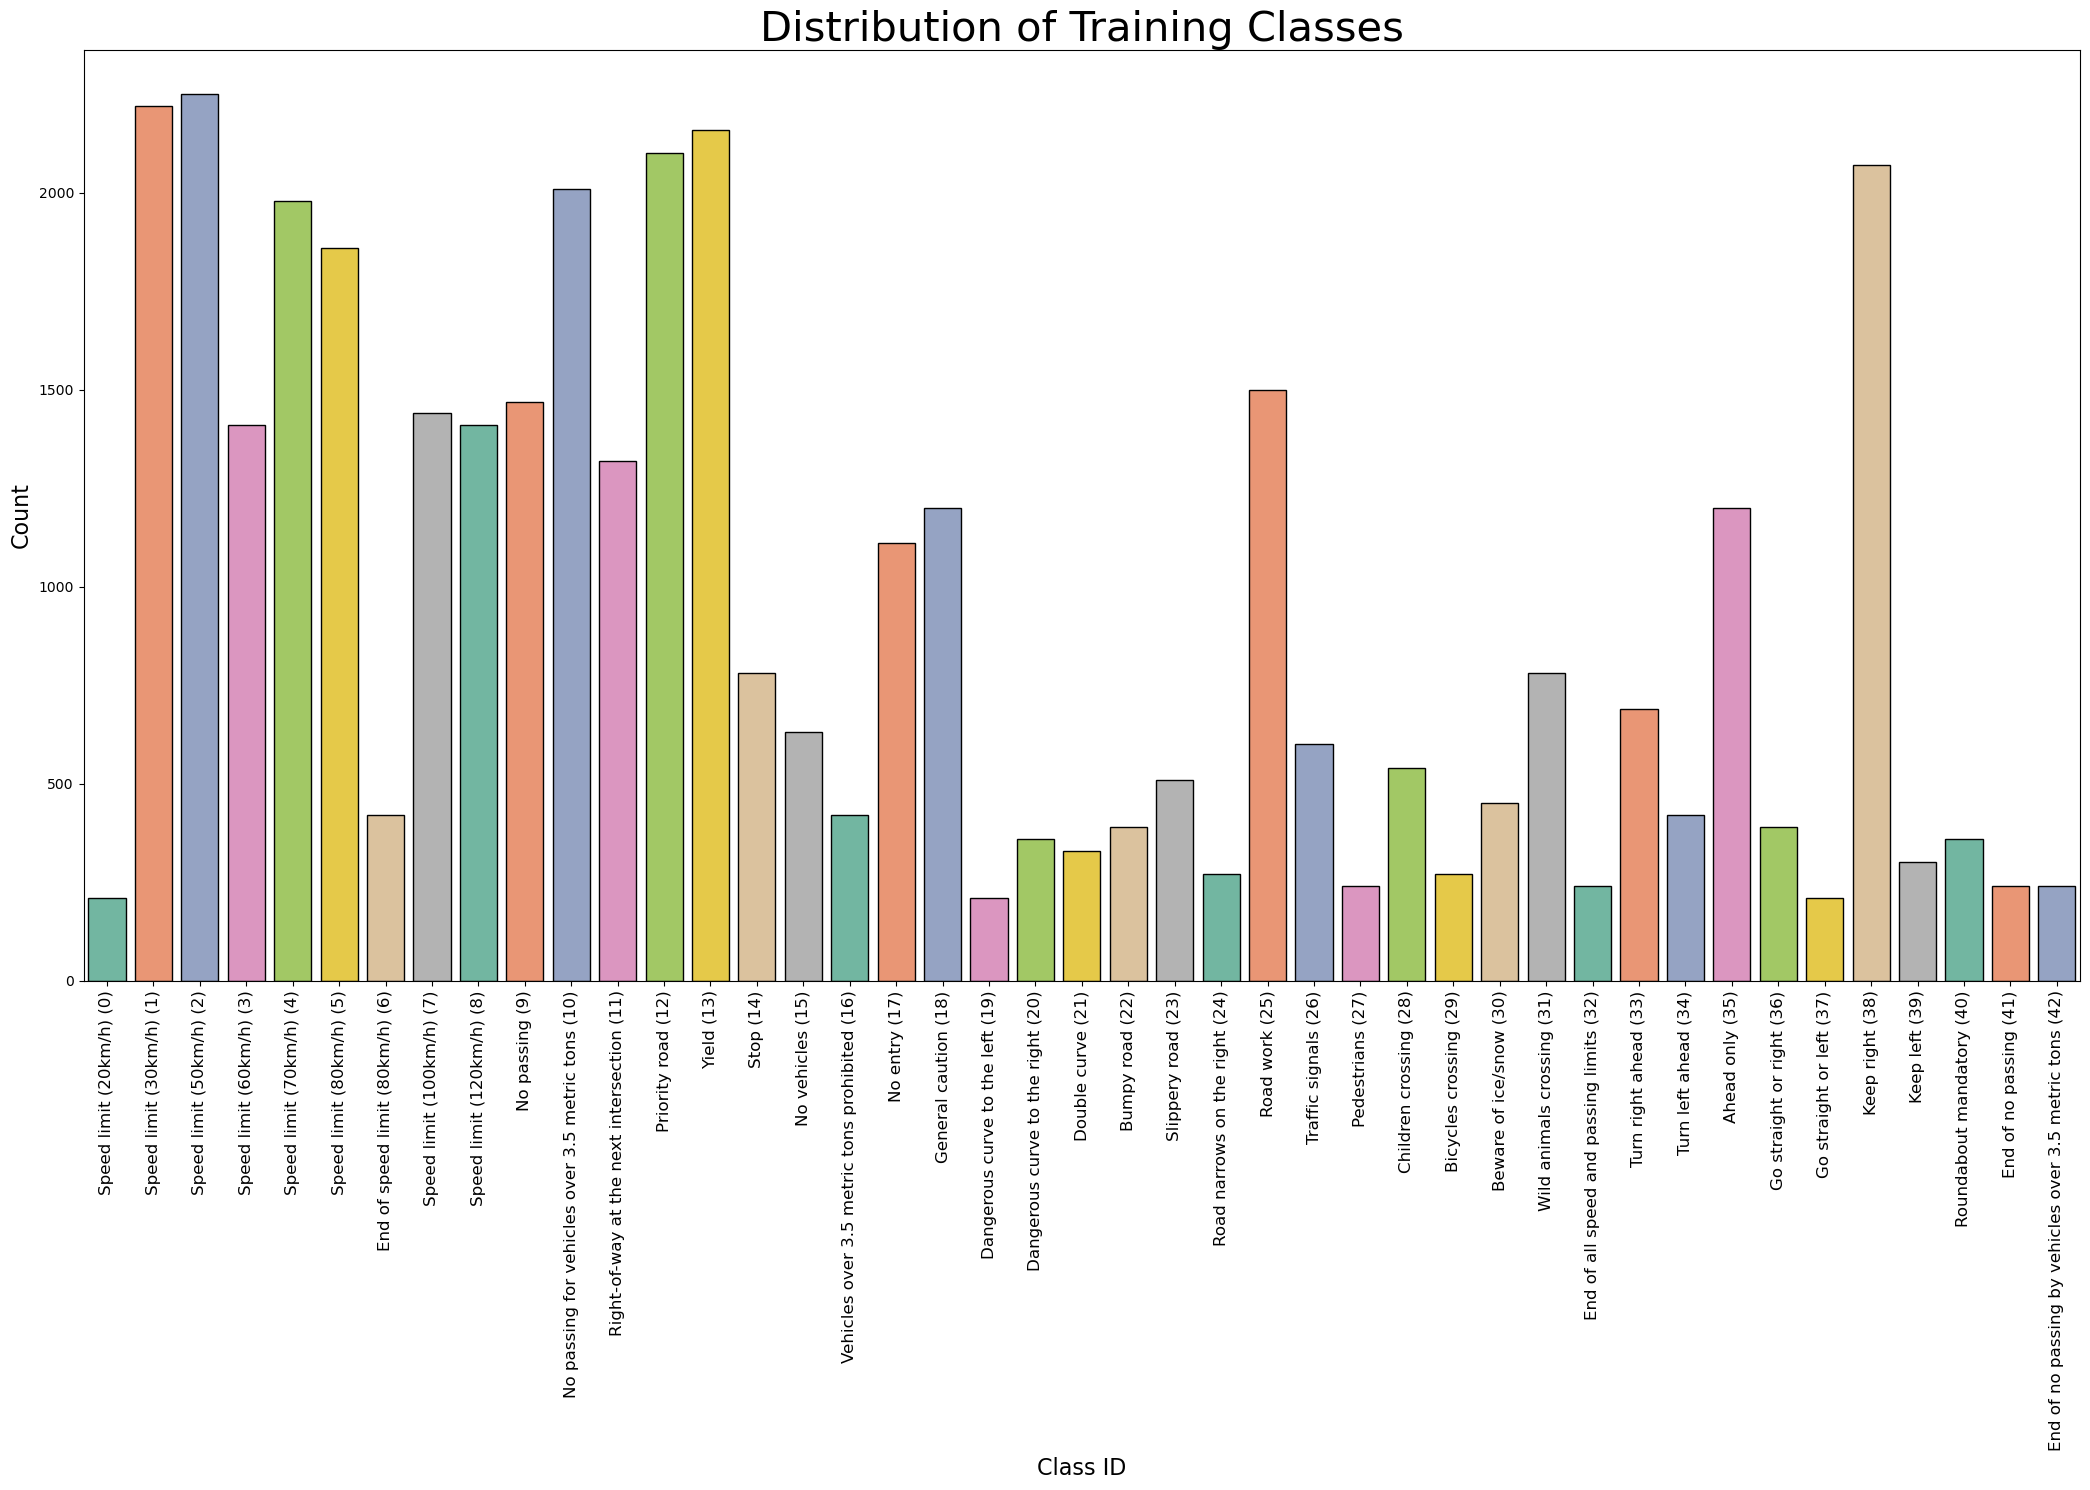

In [18]:
# First plot: Distribution of Training Classes
plt.figure(figsize=(21, 15))
sns.countplot(data=train_data, x='ClassId', palette='Set2', edgecolor='black')
plt.title('Distribution of Training Classes', fontsize=30)
plt.xlabel('Class ID', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Set x-ticks to class names with IDs in parentheses
plt.xticks(ticks=range(len(class_names)), labels=[f"{class_names[i]} ({i})" for i in range(len(class_names))], rotation=90, fontsize=12)
plt.tight_layout()
plt.show()


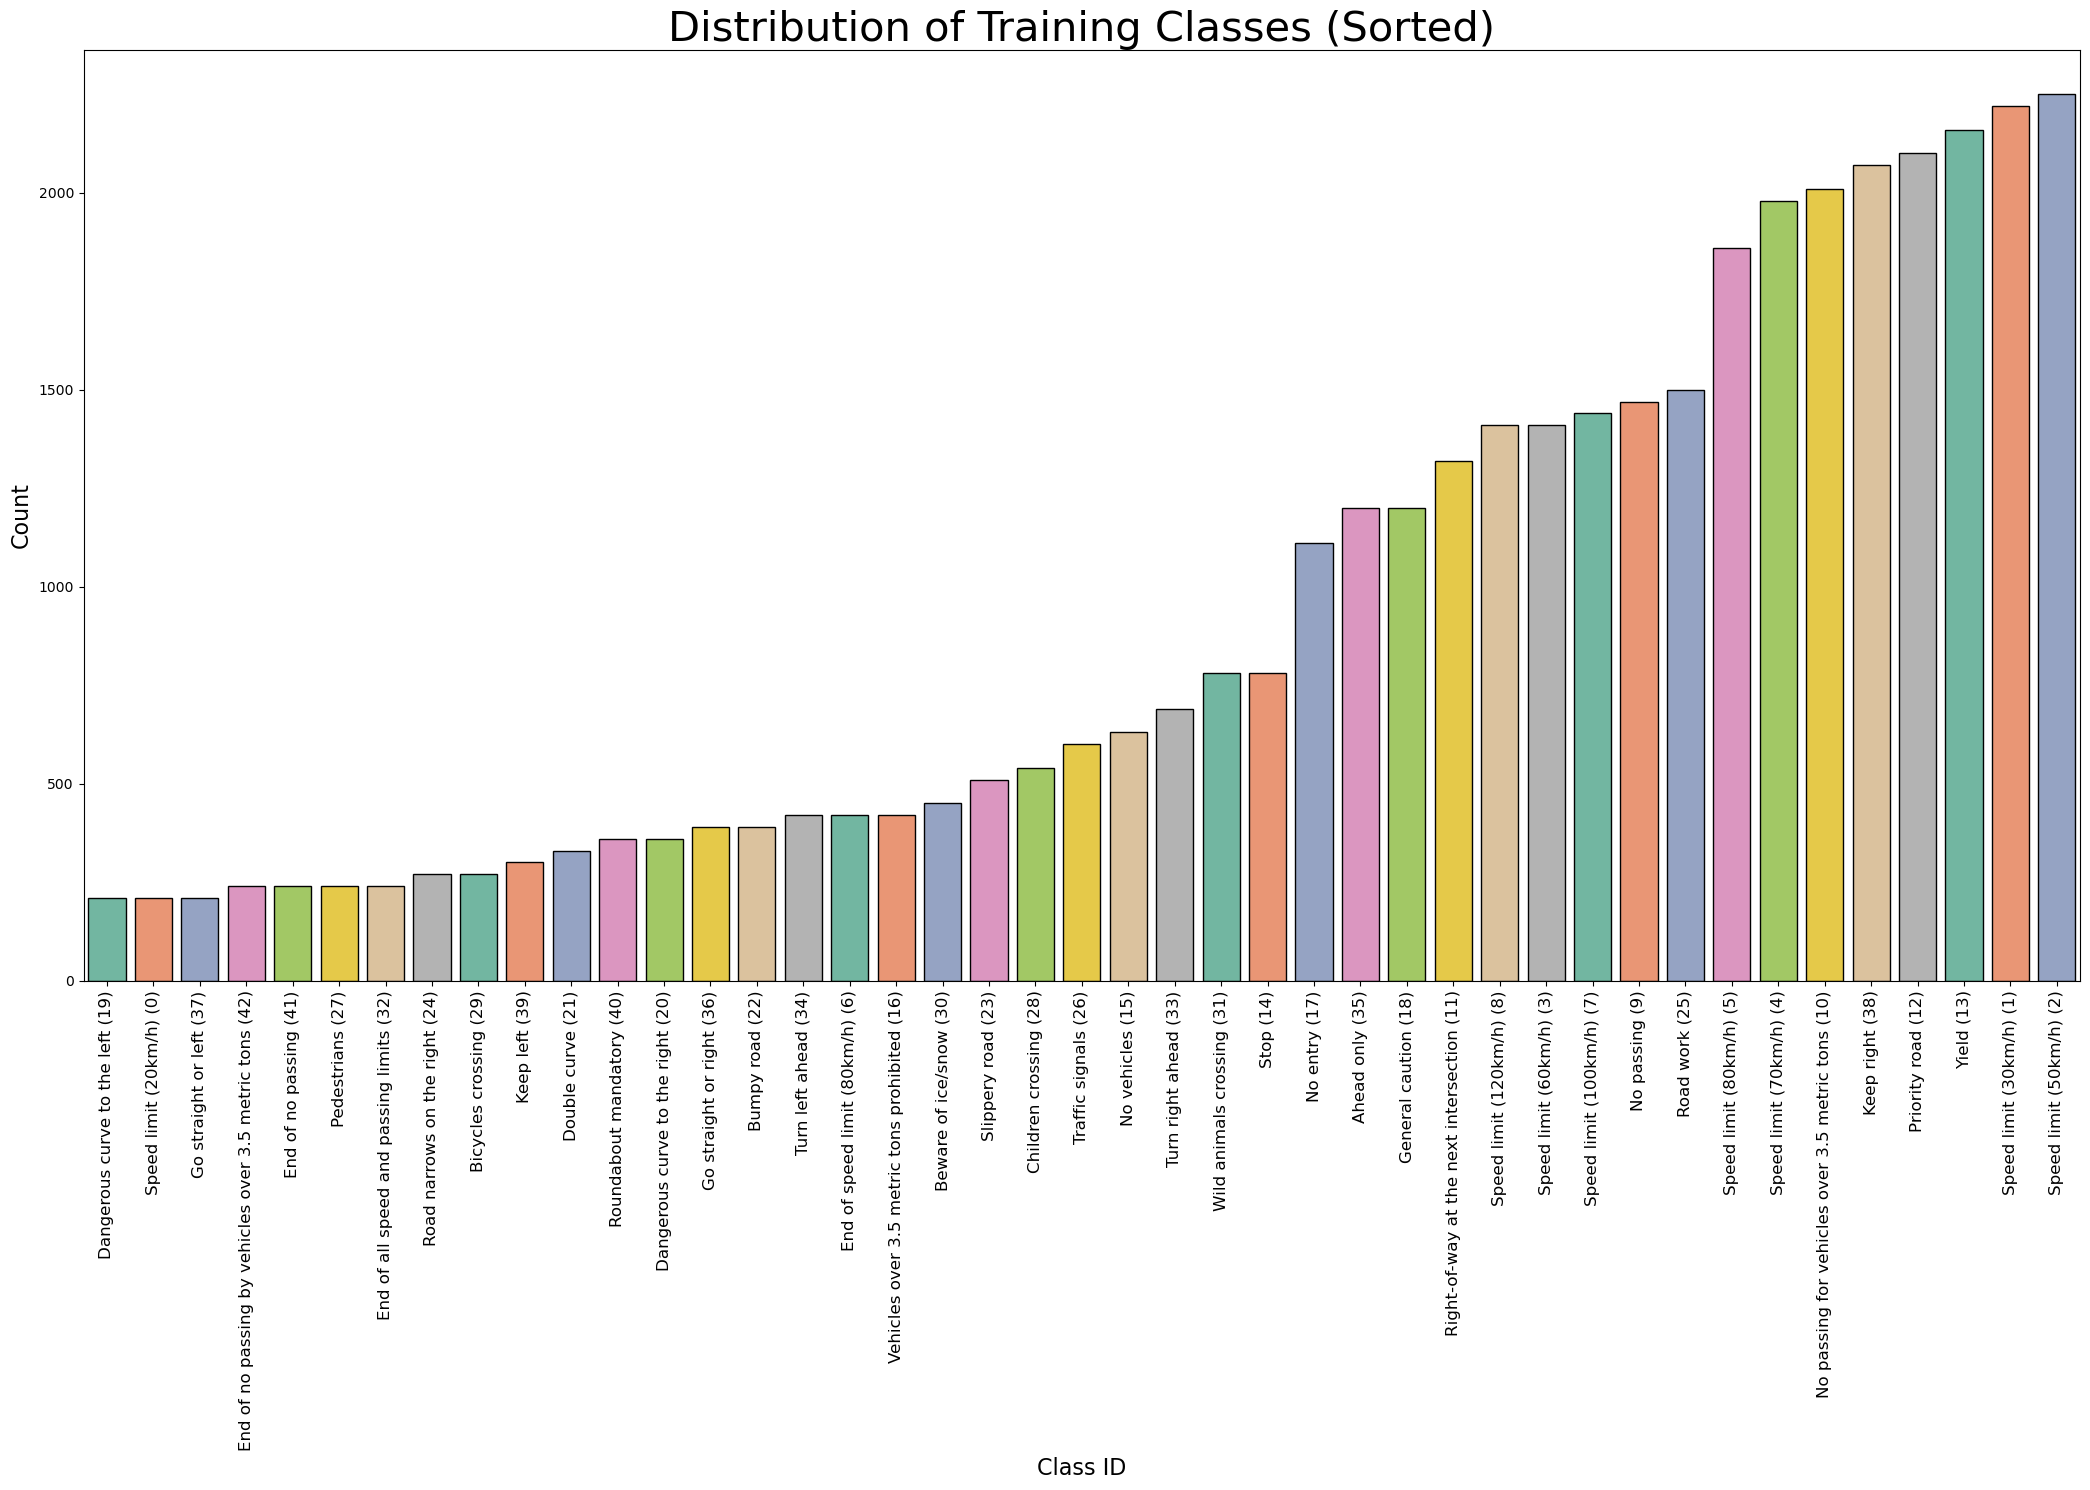

In [19]:
# Second plot: Distribution of Training Classes sorted from least to most frequent
class_counts = train_data['ClassId'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(21, 15))
sns.countplot(data=train_data, x='ClassId', order=class_counts.index, palette='Set2', edgecolor='black')
plt.title('Distribution of Training Classes (Sorted)', fontsize=30)
plt.xlabel('Class ID', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Set x-ticks to class names with IDs in parentheses
plt.xticks(ticks=range(len(class_names)), labels=[f"{class_names[i]} ({i})" for i in class_counts.index], rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


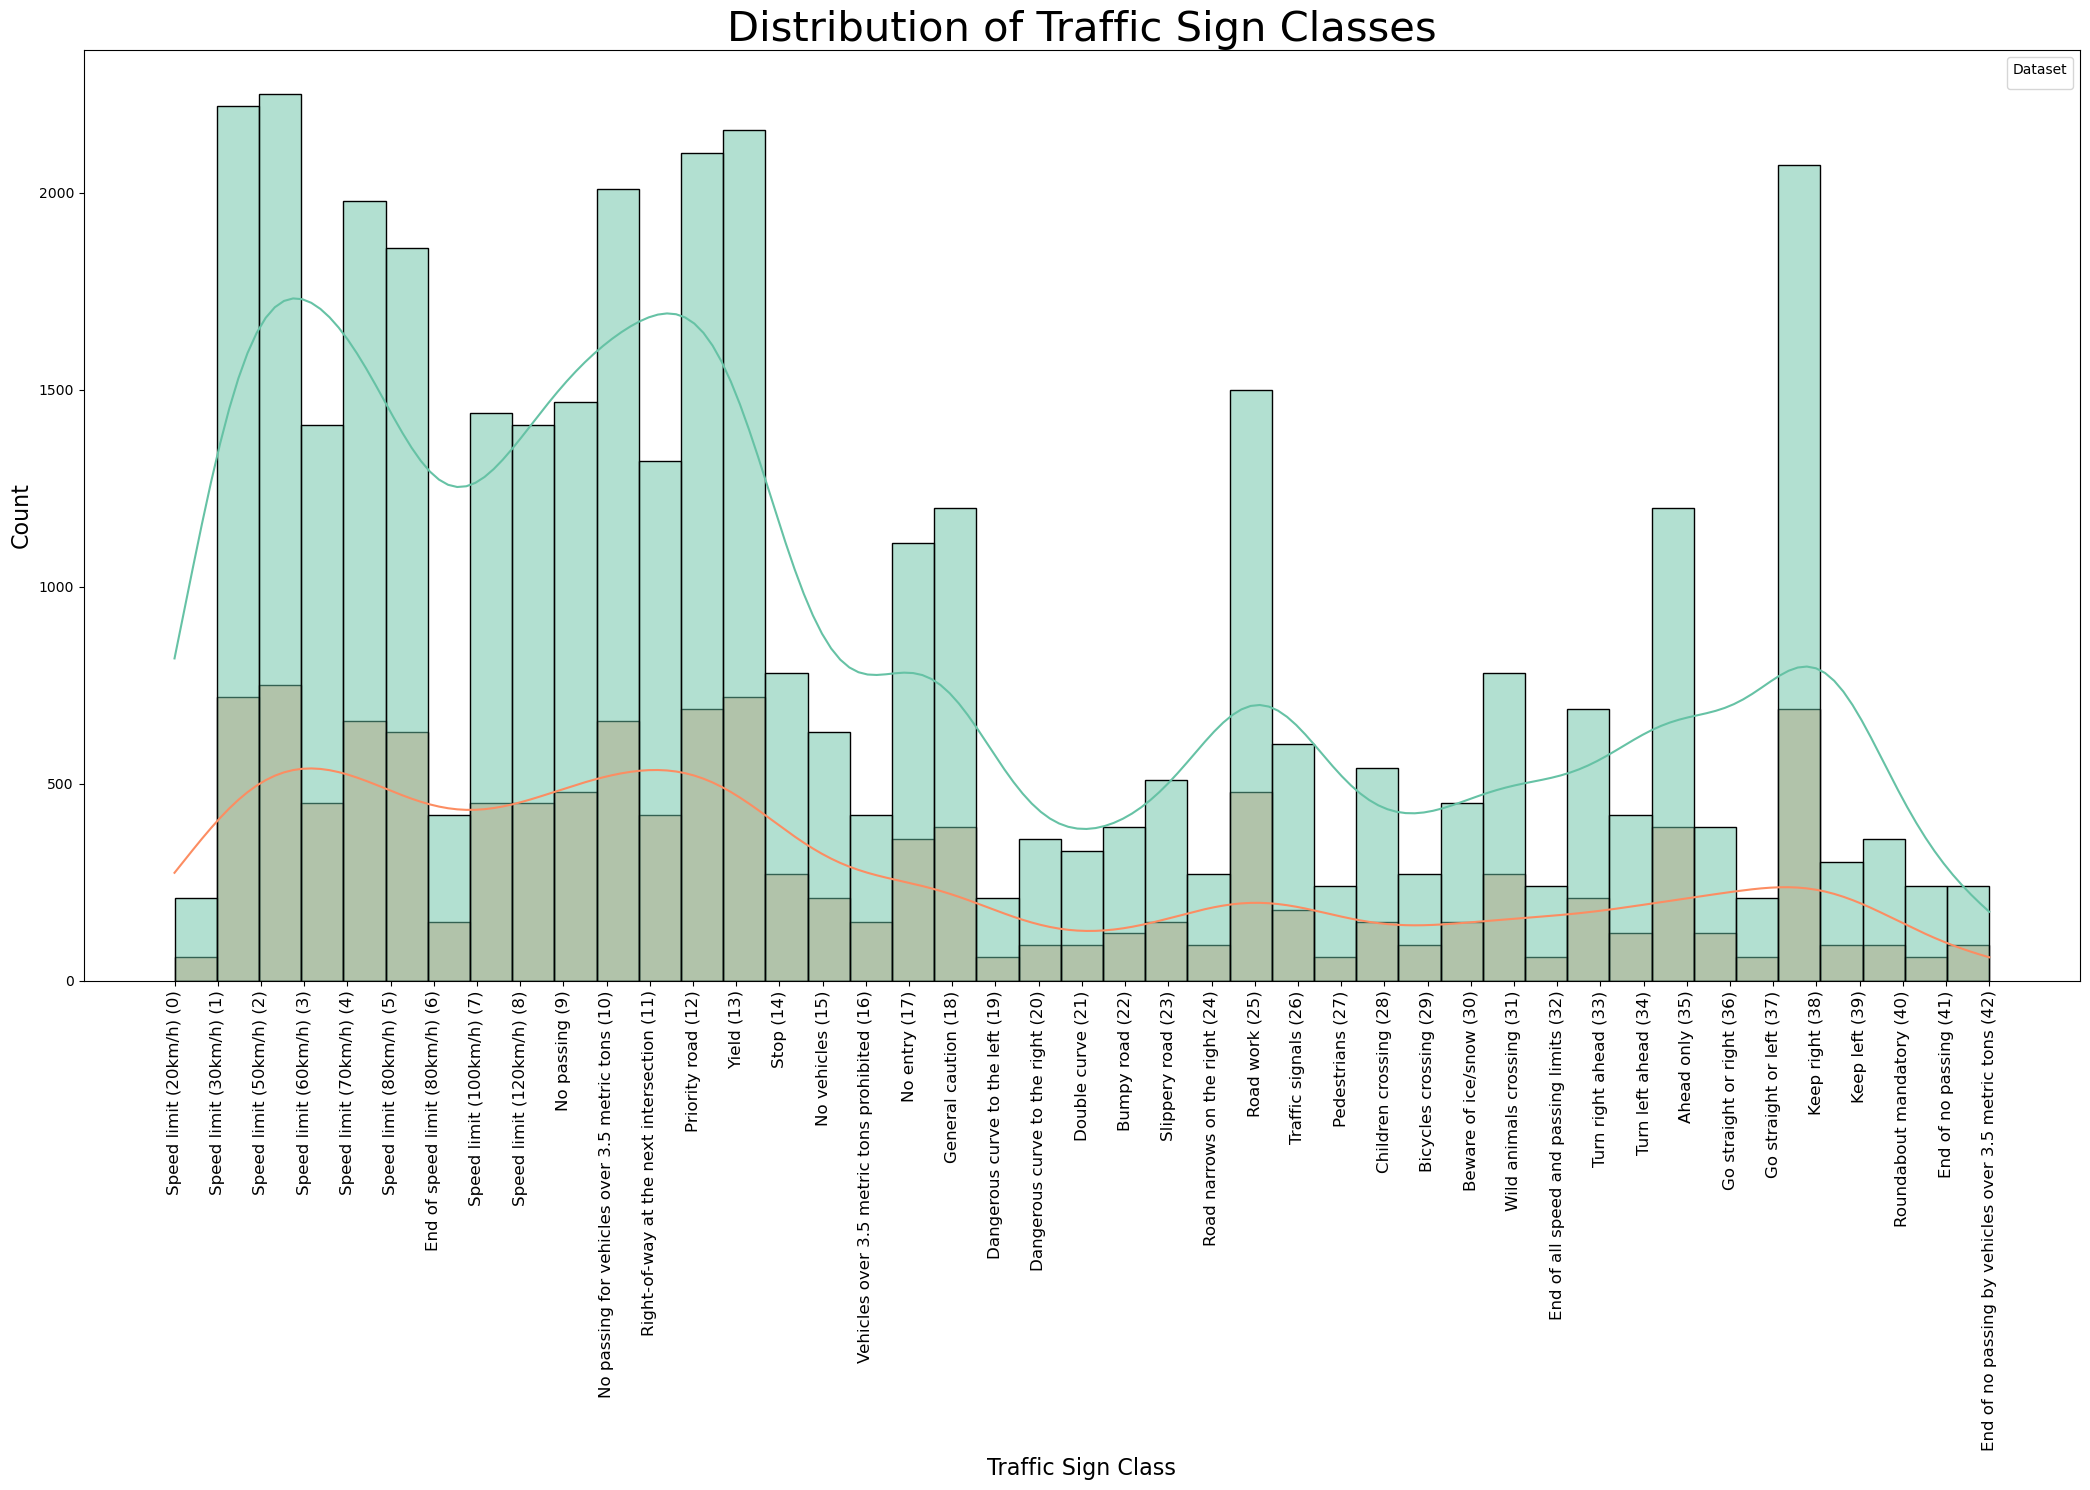

In [20]:
# Combine training and testing data
train_data['Dataset'] = 'Training'
test_data['Dataset'] = 'Testing'
combined_data = pd.concat([train_data, test_data])

# Create the count plot with KDE
plt.figure(figsize=(21, 15))

# Use histplot to create a count plot with KDE overlay
sns.histplot(data=combined_data, x='ClassId', hue='Dataset', 
             stat='count', 
             palette='Set2', edgecolor='black', 
             kde=True, bins=len(class_names), alpha=0.5, 
             common_norm=False)  # Set common_norm to False to avoid normalization

# Set the x-ticks to the class names with IDs in parentheses
plt.title('Distribution of Traffic Sign Classes', fontsize=30)
plt.xlabel('Traffic Sign Class', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Update x-ticks to include class names and IDs
plt.xticks(ticks=range(len(class_names)), labels=[f"{class_names[i]} ({i})" for i in range(len(class_names))], rotation=90, fontsize=12)

plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

In [21]:
# Calculate counts and percentages for training data
train_counts = train_data['ClassId'].value_counts()
train_percentages = (train_counts / len(train_data)) * 100

# Calculate counts and percentages for testing data
test_counts = test_data['ClassId'].value_counts()
test_percentages = (test_counts / len(test_data)) * 100

# Combine results into a single DataFrame
class_summary = pd.DataFrame({
    'ClassId': train_counts.index,
    'Train Count': train_counts.values,
    'Train Percentage': train_percentages[train_counts.index].values,
    'Test Count': test_counts.reindex(train_counts.index, fill_value=0).values,
    'Test Percentage': test_percentages.reindex(train_counts.index, fill_value=0).values
})

# Map ClassId to SignName
class_summary['SignName'] = class_summary['ClassId'].map(class_names)

In [22]:
# Display top 10 and bottom 10 classes
print("Top 10 most common classes:")
class_summary.sort_values(by='Train Count', ascending=False).head(10)

Top 10 most common classes:


ClassId  Train Count  Train Percentage  Test Count  Test Percentage  \
0        2         2250          5.738478         750         5.938242   
1        1         2220          5.661965         720         5.700713   
2       13         2160          5.508939         720         5.700713   
3       12         2100          5.355913         690         5.463183   
4       38         2070          5.279400         690         5.463183   
5       10         2010          5.126374         660         5.225653   
6        4         1980          5.049861         660         5.225653   
7        5         1860          4.743809         630         4.988124   
8       25         1500          3.825652         480         3.800475   
9        9         1470          3.749139         480         3.800475   

                                       SignName  
0                          Speed limit (50km/h)  
1                          Speed limit (30km/h)  
2                                         Yield  
3                                 Priority road  
4                                    Keep right  
5  No passing for vehicles over 3.5 metric tons  
6                          Speed limit (70km/h)  
7                          Speed limit (80km/h)  
8                                     Road work  
9                                    No passing

In [23]:
print("\nBottom 10 least common classes:")
class_summary.sort_values(by='Train Count', ascending=True).head(10)


Bottom 10 least common classes:


ClassId  Train Count  Train Percentage  Test Count  Test Percentage  \
42       19          210          0.535591          60         0.475059   
41        0          210          0.535591          60         0.475059   
40       37          210          0.535591          60         0.475059   
39       42          240          0.612104          90         0.712589   
38       41          240          0.612104          60         0.475059   
37       27          240          0.612104          60         0.475059   
36       32          240          0.612104          60         0.475059   
35       24          270          0.688617          90         0.712589   
34       29          270          0.688617          90         0.712589   
33       39          300          0.765130          90         0.712589   

                                             SignName  
42                        Dangerous curve to the left  
41                               Speed limit (20km/h)  
40                                Go straight or left  
39  End of no passing by vehicles over 3.5 metric ...  
38                                  End of no passing  
37                                        Pedestrians  
36                End of all speed and passing limits  
35                          Road narrows on the right  
34                                  Bicycles crossing  
33                                          Keep left

## 3.2 Image Properties Analysis
### Let's analyze some properties of the training images:

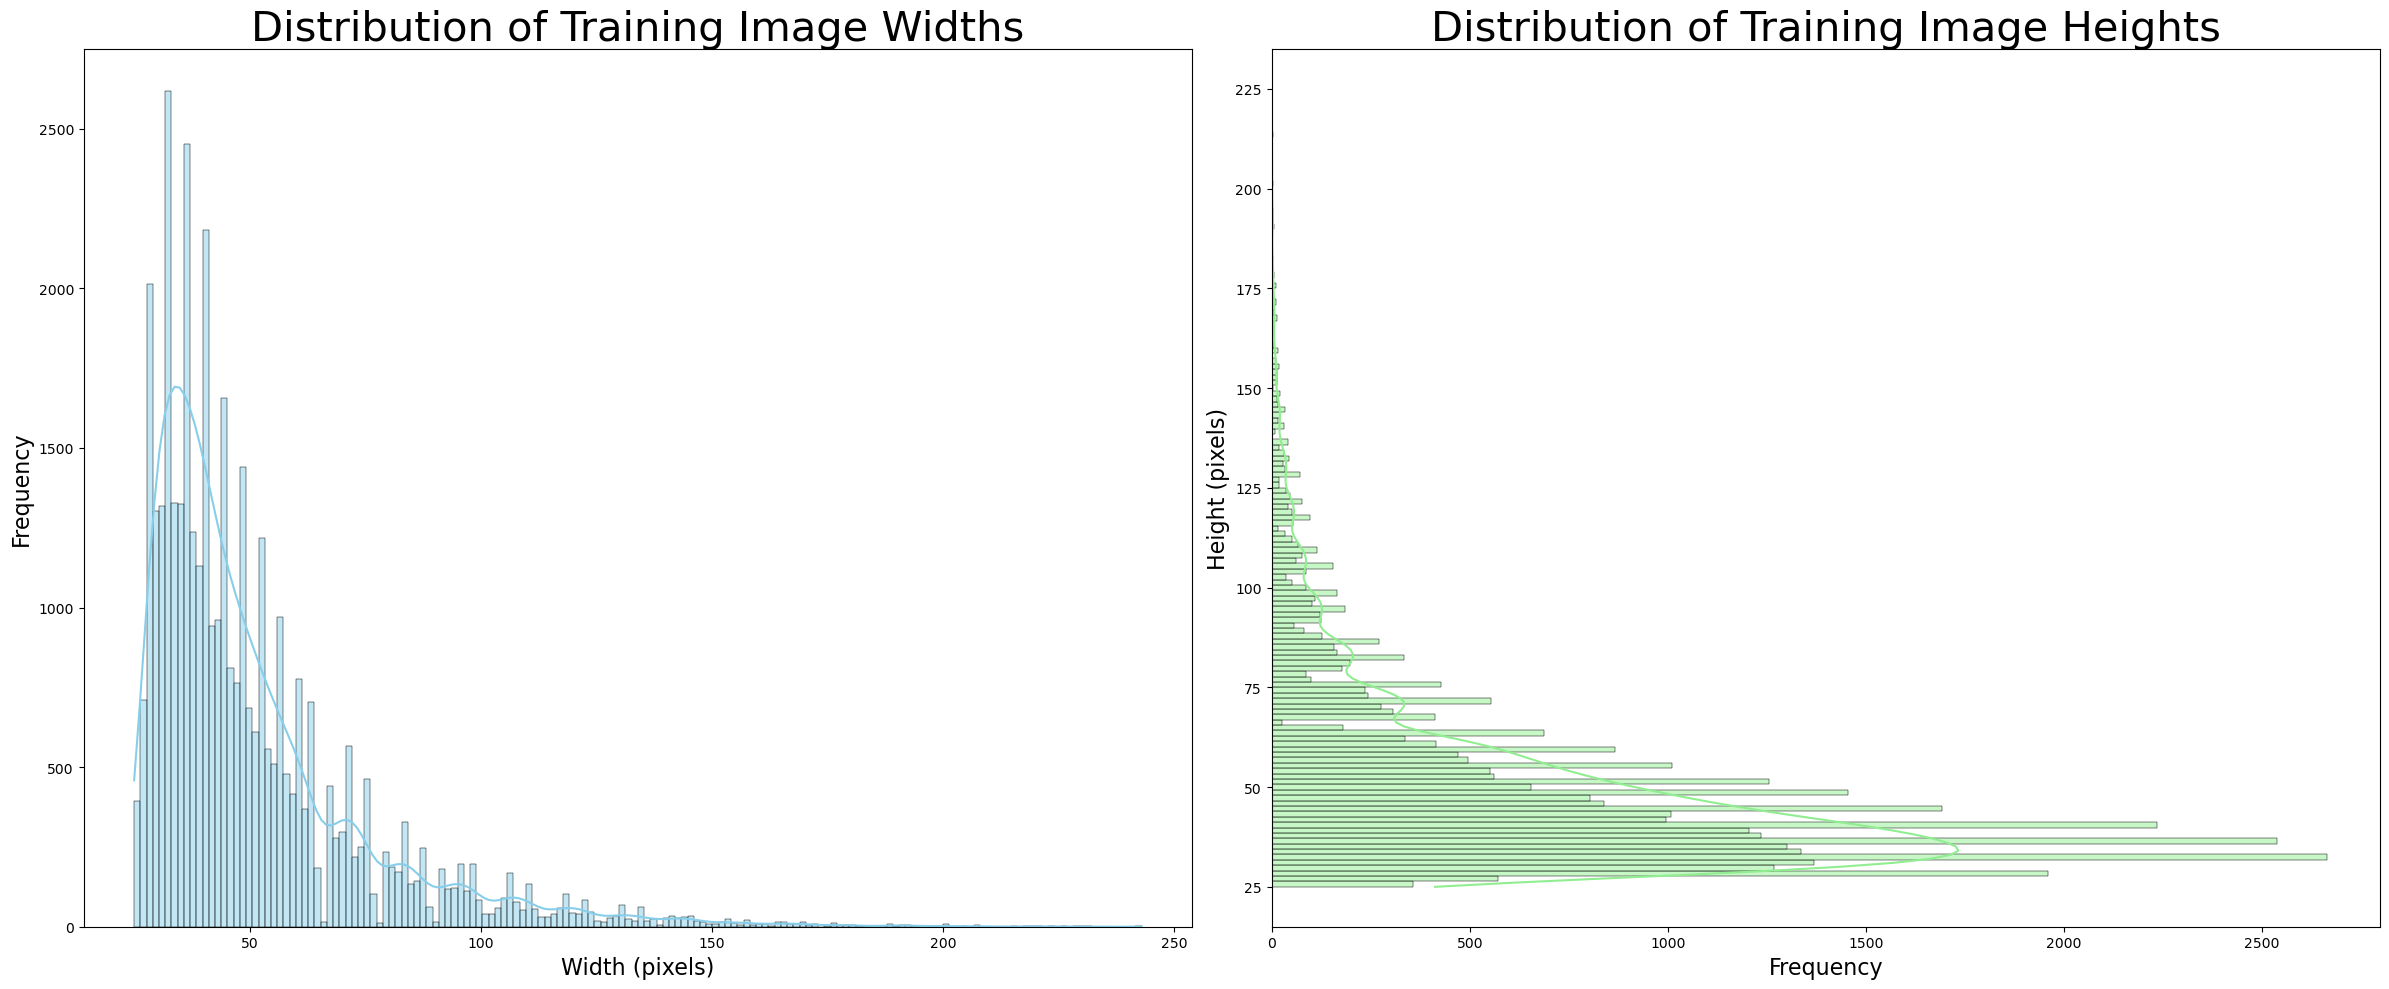

In [25]:
# Assuming 'Width' and 'Height' columns exist in the train_data
plt.figure(figsize=(24, 10))

# First subplot for Width distribution
plt.subplot(1, 2, 1)
sns.histplot(data=train_data, x='Width', kde=True, color='skyblue', edgecolor='black')  # Added color and edgecolor
plt.title('Distribution of Training Image Widths', fontsize=30)
plt.xlabel('Width (pixels)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Second subplot for Height distribution
plt.subplot(1, 2, 2)
sns.histplot(data=train_data, y='Height', kde=True, color='lightgreen', edgecolor='black')  # Added color and edgecolor
plt.title('Distribution of Training Image Heights', fontsize=30)
plt.ylabel('Height (pixels)', fontsize=16)
plt.xlabel('Frequency', fontsize=16)

plt.tight_layout()
plt.show()

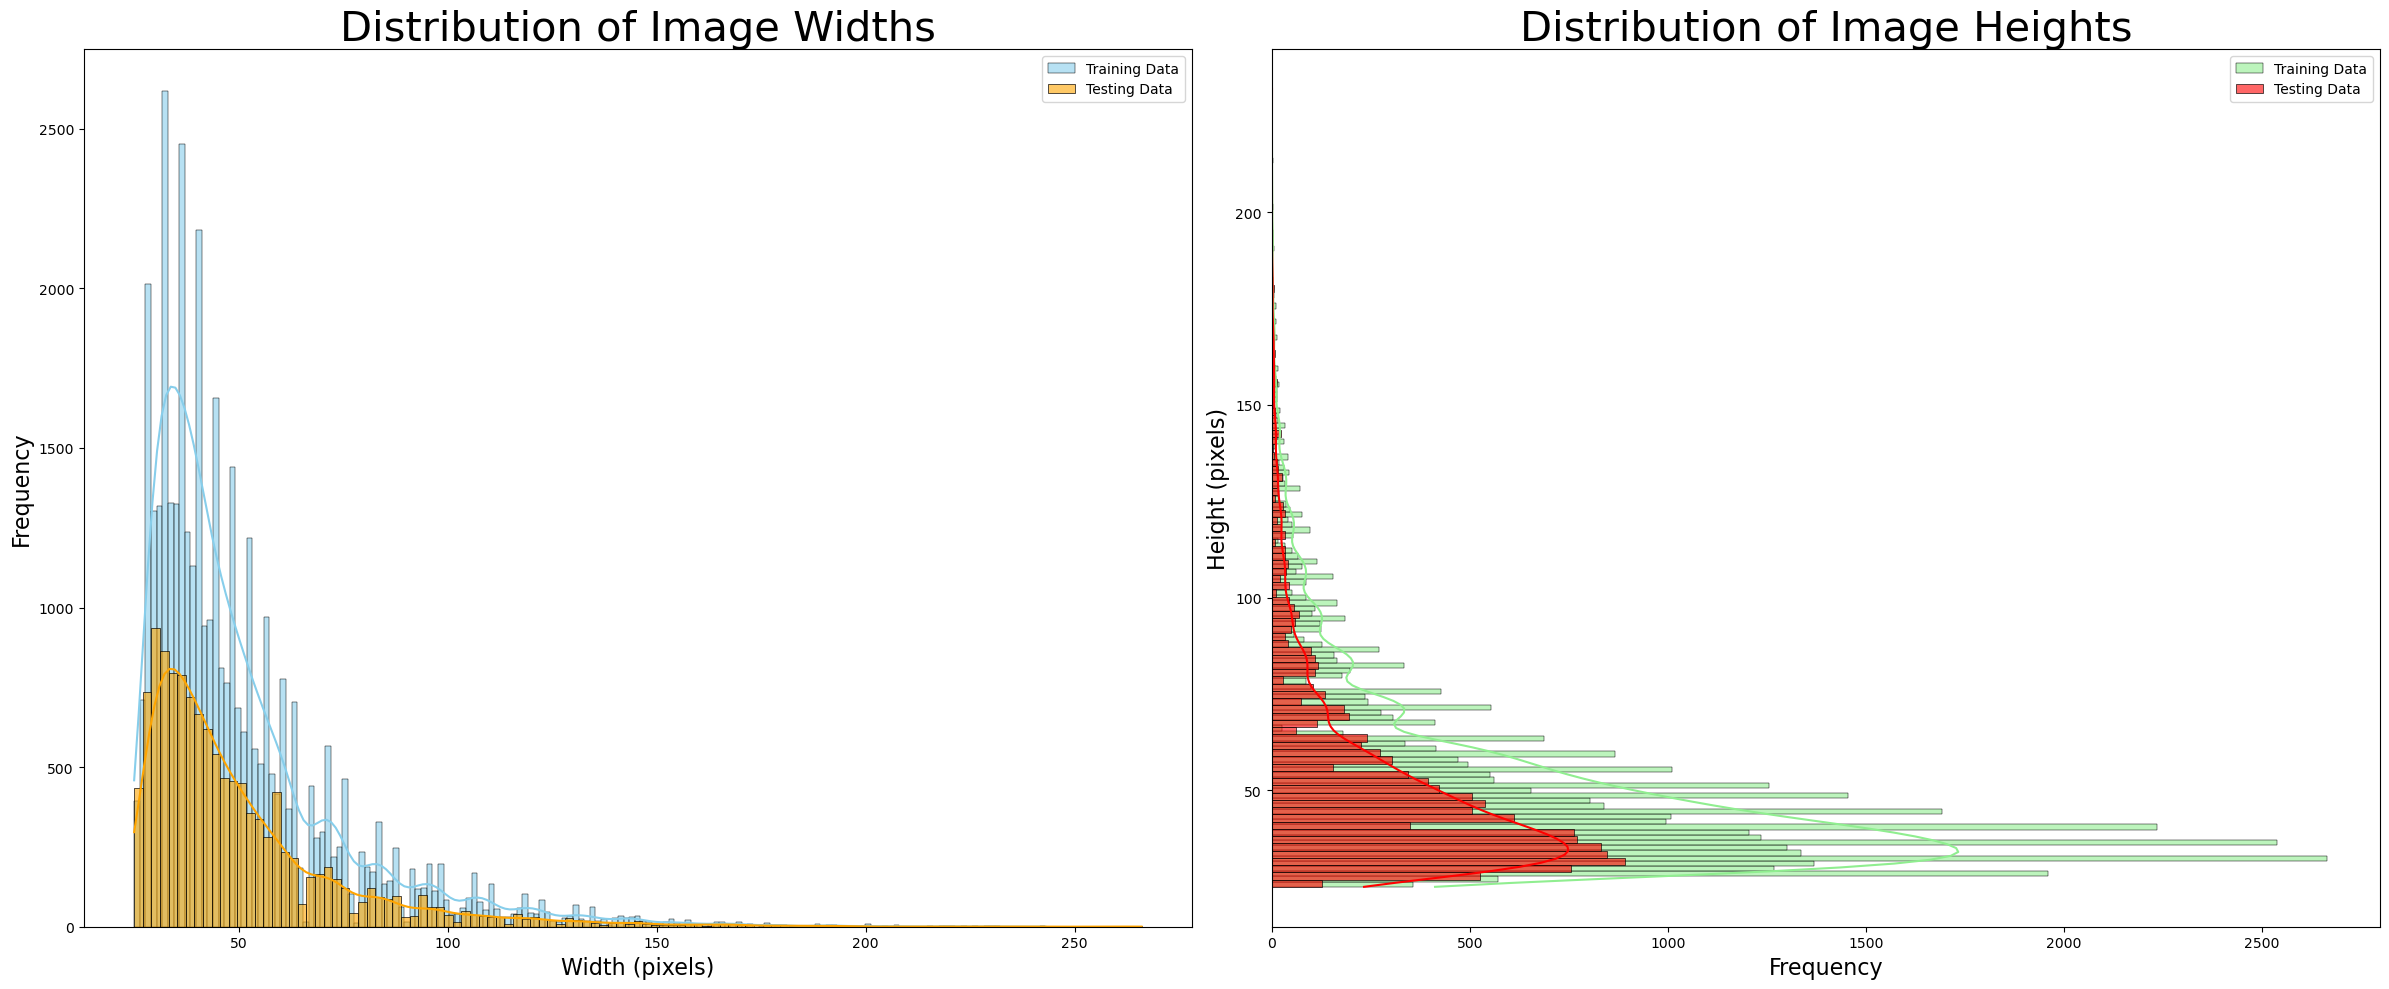

In [26]:
# Assuming 'Width' and 'Height' columns exist in both train_data and test_data
plt.figure(figsize=(24, 10))

# First subplot for Width distribution
plt.subplot(1, 2, 1)
sns.histplot(data=train_data, x='Width', kde=True, color='skyblue', edgecolor='black', label='Training Data', alpha=0.6)  # Training data
sns.histplot(data=test_data, x='Width', kde=True, color='orange', edgecolor='black', label='Testing Data', alpha=0.6)  # Testing data
plt.title('Distribution of Image Widths', fontsize=30)
plt.xlabel('Width (pixels)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend()  # Add legend for Width distribution

# Second subplot for Height distribution
plt.subplot(1, 2, 2)
sns.histplot(data=train_data, y='Height', kde=True, color='lightgreen', edgecolor='black', label='Training Data', alpha=0.6)  # Training data
sns.histplot(data=test_data, y='Height', kde=True, color='red', edgecolor='black', label='Testing Data', alpha=0.6)  # Testing data
plt.title('Distribution of Image Heights', fontsize=30)
plt.ylabel('Height (pixels)', fontsize=16)
plt.xlabel('Frequency', fontsize=16)
plt.legend()  # Add legend for Height distribution

plt.tight_layout()
plt.show()

In [27]:
# Set dataset directory
dataset_dir = 'data/'
train_csv_path = os.path.join(dataset_dir, 'Train.csv')
test_csv_path = os.path.join(dataset_dir, 'Test.csv')
meta_info = os.path.join(dataset_dir, 'Meta.csv')

# Load datasets
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)
meta_df = pd.read_csv(meta_info)

# Preprocess image paths
train_df['Path'] = train_df['Path'].apply(lambda x: os.path.join(dataset_dir, x.lower()))
test_df['Path']  = test_df['Path'].apply(lambda x: os.path.join(dataset_dir, x.lower()))
meta_df['Path']  = meta_df['Path'].apply(lambda x: os.path.join(dataset_dir, x.lower()))

# Display sample data
train_df.sample(10)

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
30003     42      40       6       6      37      35       26   
23050     55      62       6       5      49      57       14   
21060     35      32       6       6      30      27       13   
15561     45      45       6       6      40      40       10   
23655     46      47       5       6      41      42       15   
18488     32      27       6       5      27      21       12   
29947     44      42       5       5      39      37       25   
3105      39      38       5       5      34      33        2   
17444     54      52       5       6      48      47       11   
34999     52      52       5       5      47      47       35   

                                      Path  
30003  data/train/26/00026_00001_00003.png  
23050  data/train/14/00014_00014_00010.png  
21060  data/train/13/00013_00020_00000.png  
15561  data/train/10/00010_00017_00021.png  
23655  data/train/15/00015_00008_00015.png  
18488  data/train/12/00012_00004_00008.png  
29947  data/train/25/00025_00049_00007.png  
3105    data/train/2/00002_00010_00015.png  
17444  data/train/11/00011_00013_00014.png  
34999  data/train/35/00035_00026_00020.png

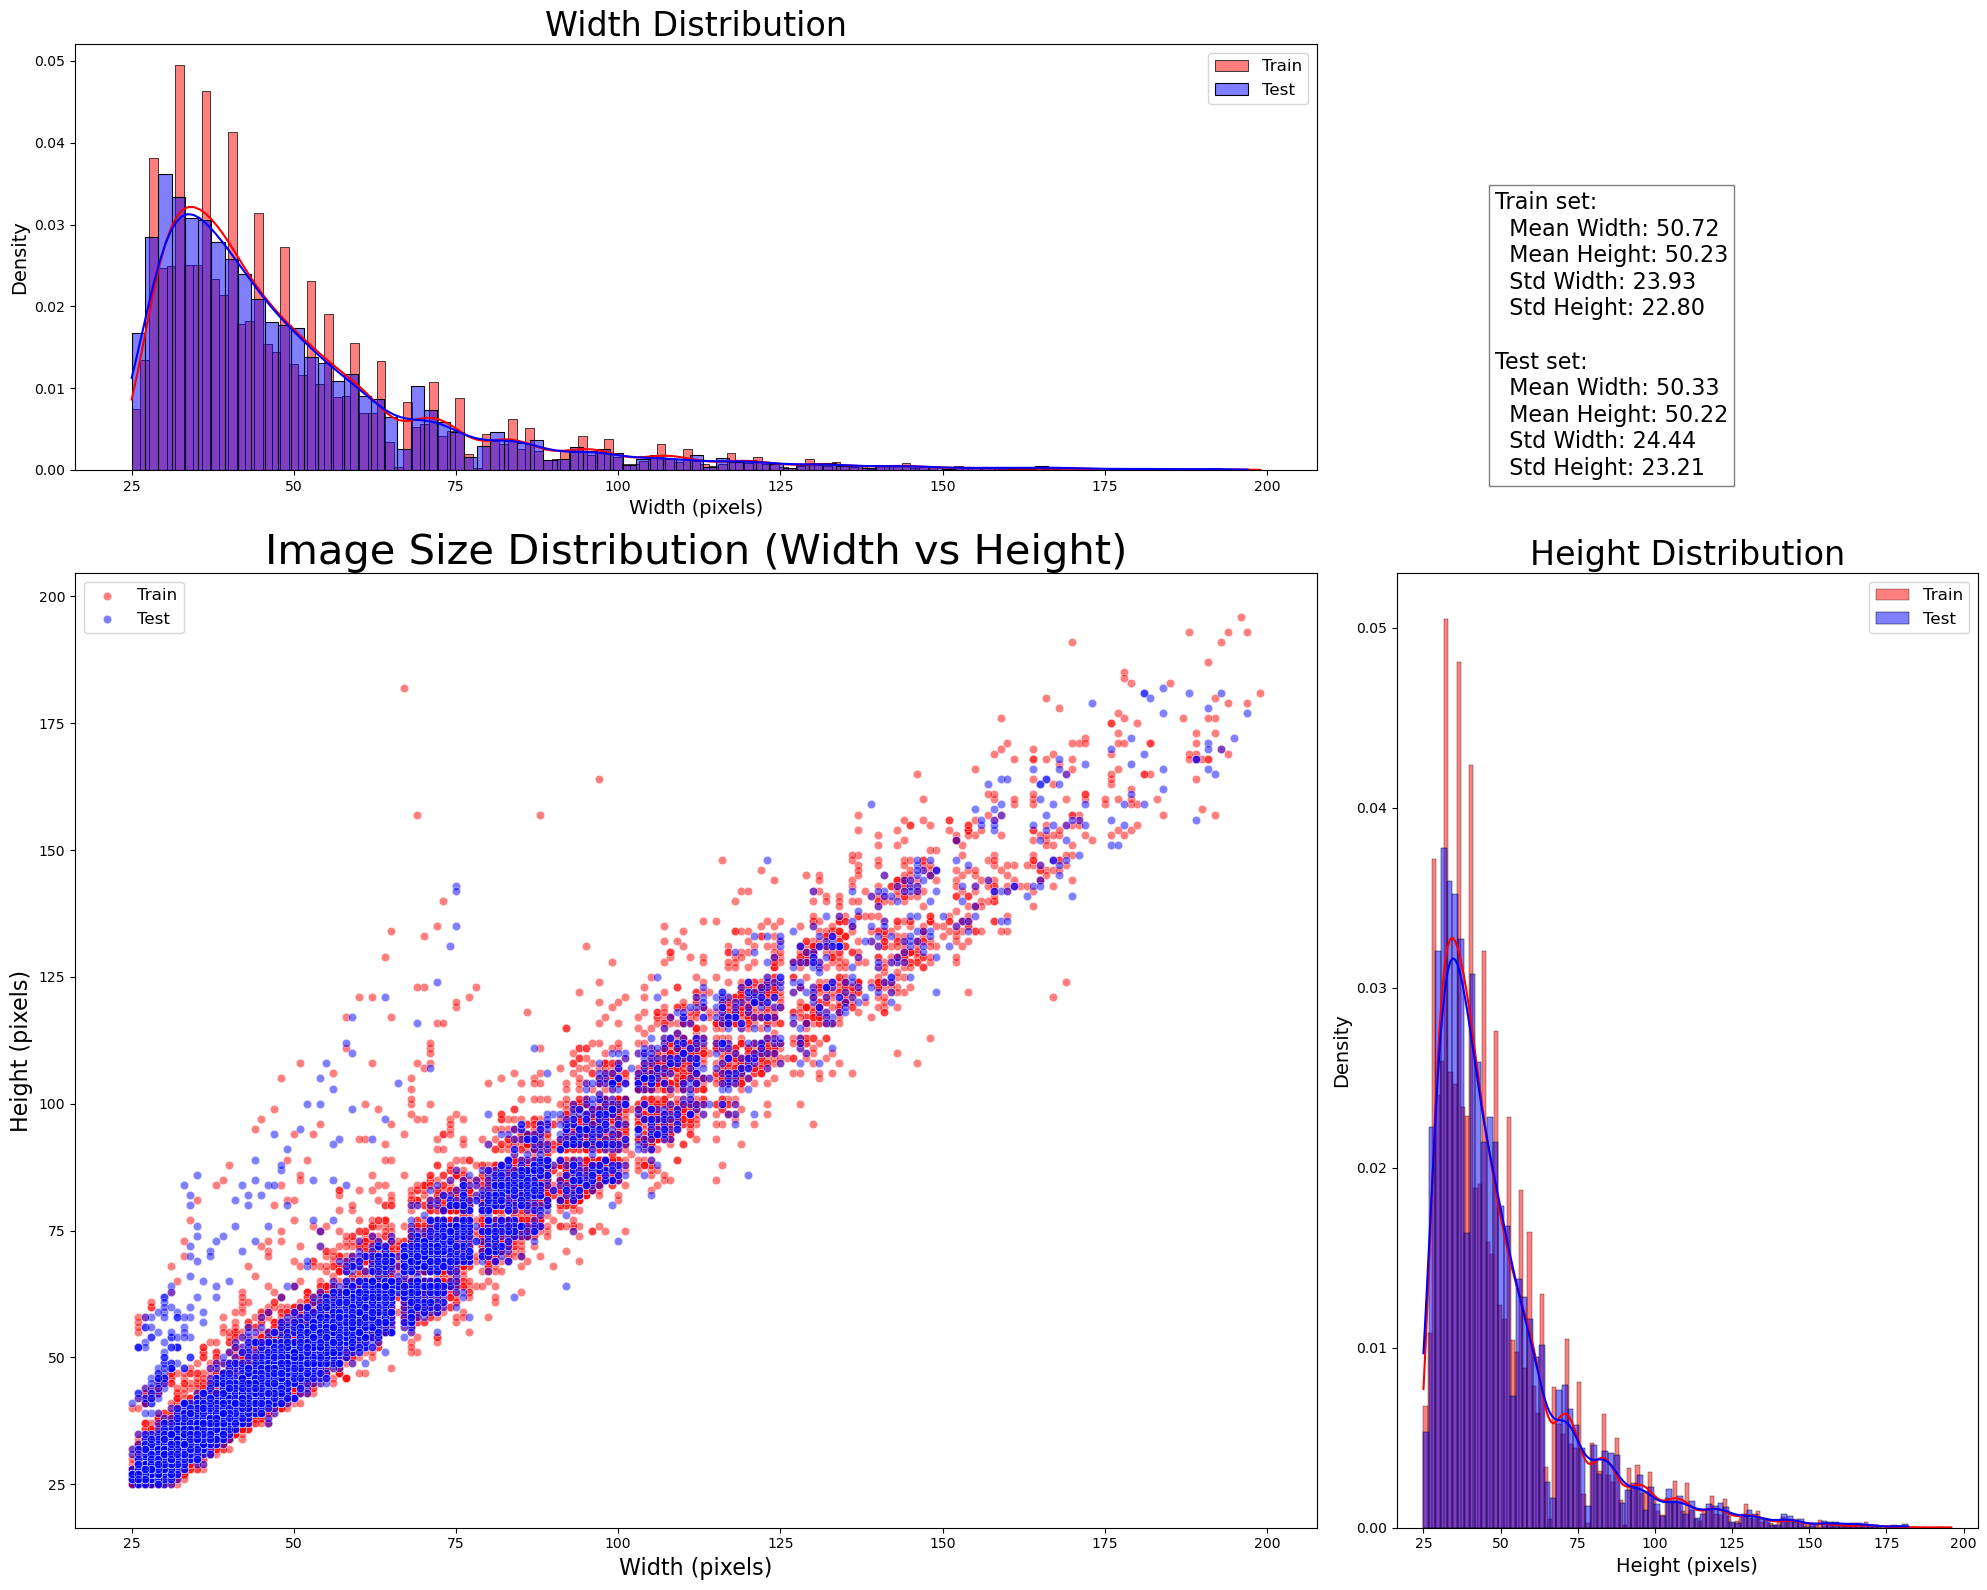

In [28]:
# Filter datasets for images with width and height less than 100
train_df_dpi_subset = train_df[(train_df.Width < 200) & (train_df.Height < 200)]
test_df_dpi_subset  = test_df[(test_df.Width < 200) & (test_df.Height < 200)]

# Create a figure with subplots
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(3, 3)

# Main scatter plot
ax_main = fig.add_subplot(gs[1:, :2])
sns.scatterplot(data=train_df_dpi_subset, x="Width", y="Height", color="red", alpha=0.5, label='Train', ax=ax_main)
sns.scatterplot(data=test_df_dpi_subset, x="Width", y="Height", color="blue", alpha=0.5, label='Test', ax=ax_main)
ax_main.set_xlabel('Width (pixels)', fontsize=16)
ax_main.set_ylabel('Height (pixels)', fontsize=16)
ax_main.set_title('Image Size Distribution (Width vs Height)', fontsize=30)
ax_main.legend(fontsize=12)

# Width distribution
ax_width = fig.add_subplot(gs[0, :2])
sns.histplot(train_df_dpi_subset.Width, kde=True, color="red", ax=ax_width, label='Train', stat='density', alpha=0.5)
sns.histplot(test_df_dpi_subset.Width, kde=True, color="blue", ax=ax_width, label='Test', stat='density', alpha=0.5)
ax_width.set_xlabel('Width (pixels)', fontsize=14)
ax_width.set_ylabel('Density', fontsize=14)
ax_width.set_title('Width Distribution', fontsize=24)
ax_width.legend(fontsize=12)

# Height distribution
ax_height = fig.add_subplot(gs[1:, 2])
sns.histplot(train_df_dpi_subset.Height, kde=True, color="red", ax=ax_height, label='Train', stat='density', alpha=0.5, orientation='horizontal')
sns.histplot(test_df_dpi_subset.Height, kde=True, color="blue", ax=ax_height, label='Test', stat='density', alpha=0.5, orientation='horizontal')
ax_height.set_ylabel('Density', fontsize=14)
ax_height.set_xlabel('Height (pixels)', fontsize=14)
ax_height.set_title('Height Distribution', fontsize=24)
ax_height.legend(fontsize=12)

# Add text box with statistics
stats_text = (
    f"Train set:\n"
    f"  Mean Width: {train_df_dpi_subset.Width.mean():.2f}\n"
    f"  Mean Height: {train_df_dpi_subset.Height.mean():.2f}\n"
    f"  Std Width: {train_df_dpi_subset.Width.std():.2f}\n"
    f"  Std Height: {train_df_dpi_subset.Height.std():.2f}\n\n"
    f"Test set:\n"
    f"  Mean Width: {test_df_dpi_subset.Width.mean():.2f}\n"
    f"  Mean Height: {test_df_dpi_subset.Height.mean():.2f}\n"
    f"  Std Width: {test_df_dpi_subset.Width.std():.2f}\n"
    f"  Std Height: {test_df_dpi_subset.Height.std():.2f}"
)
fig.text(0.75, 0.7, stats_text, fontsize=16, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

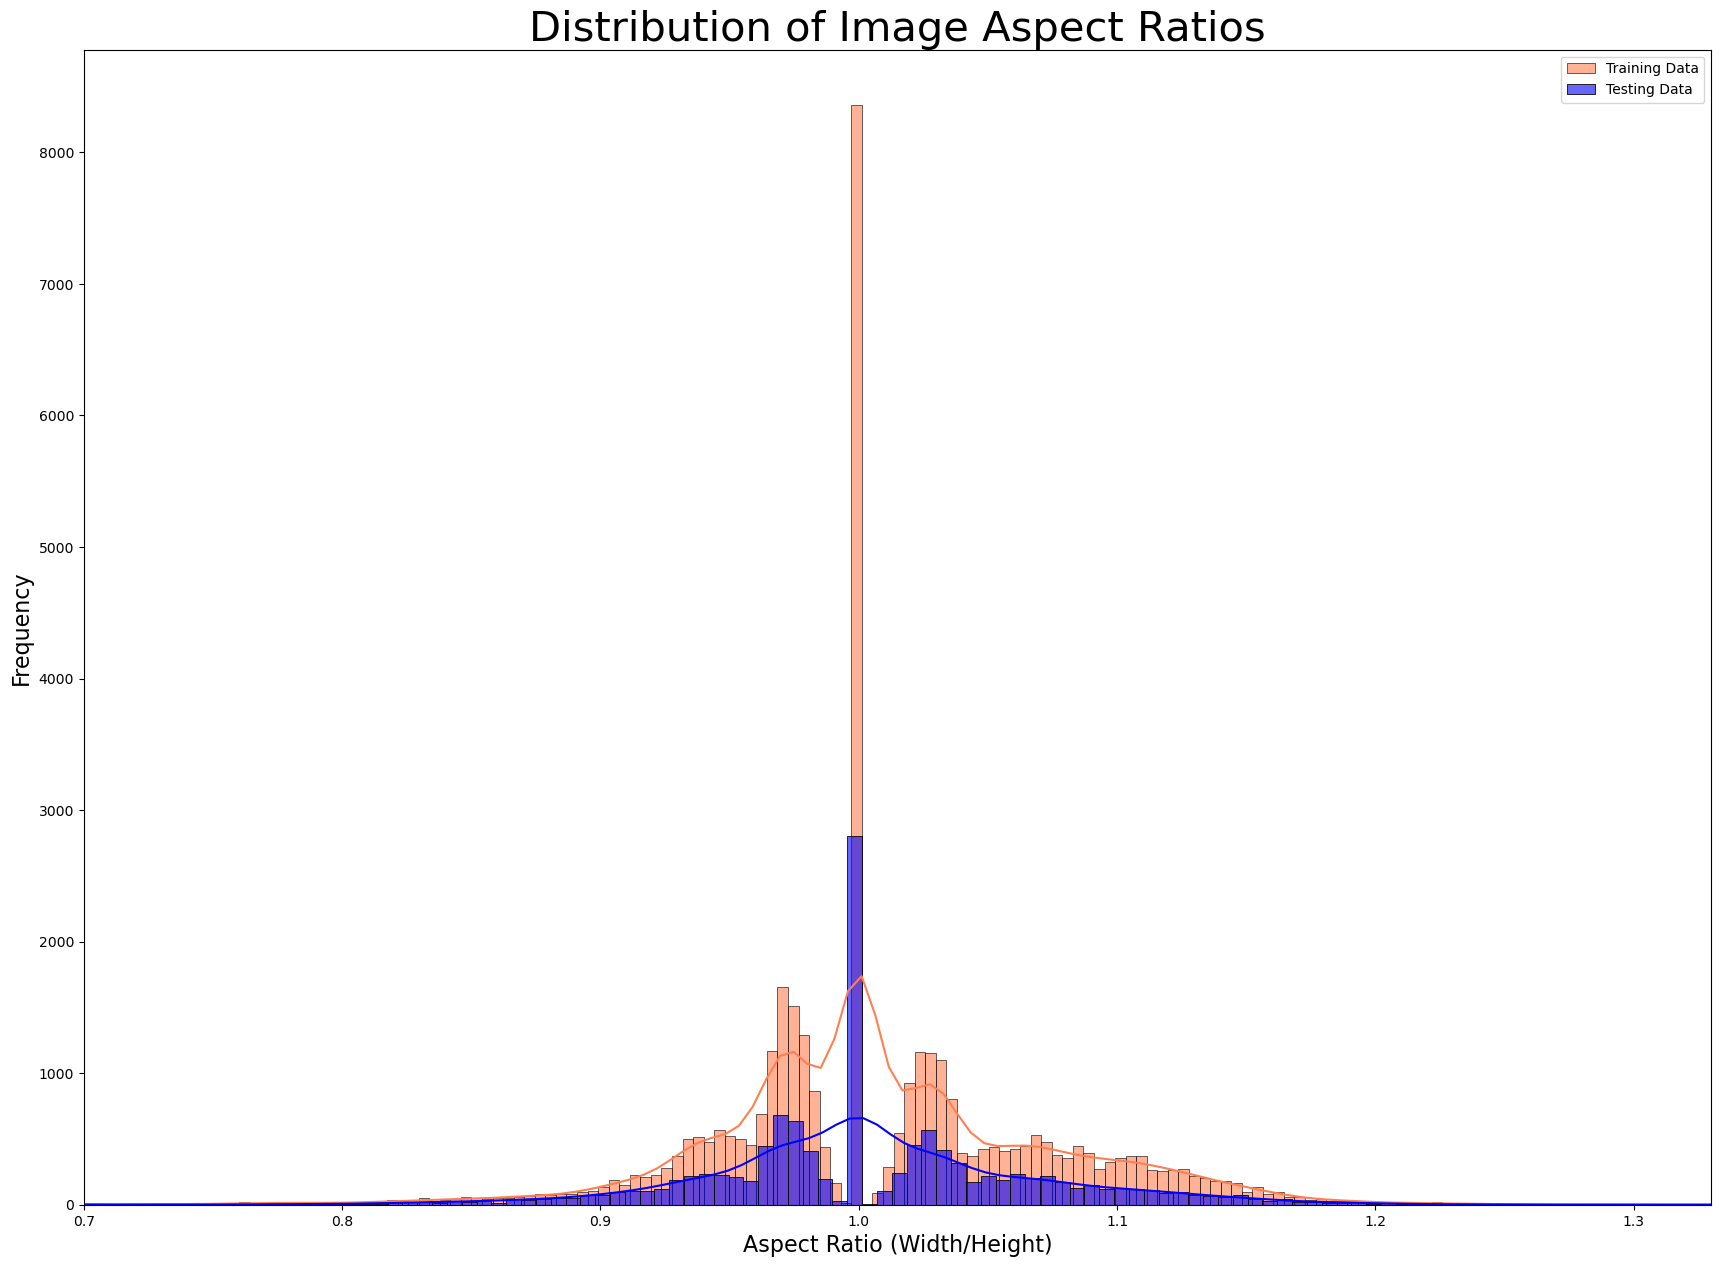

In [29]:
# Calculate aspect ratios
train_data['Aspect_Ratio'] = train_data['Width'] / train_data['Height']
test_data['Aspect_Ratio'] = test_data['Width'] / test_data['Height']  # Calculate aspect ratios for test data

plt.figure(figsize=(21, 15))
sns.histplot(data=train_data, x='Aspect_Ratio', kde=True, color='coral', edgecolor='black', label='Training Data', alpha=0.6)  # Training data
sns.histplot(data=test_data, x='Aspect_Ratio', kde=True, color='blue', edgecolor='black', label='Testing Data', alpha=0.6)  # Testing data
plt.title('Distribution of Image Aspect Ratios', fontsize=30)
plt.xlabel('Aspect Ratio (Width/Height)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Adjust x-axis limits for aspect ratios
plt.xlim(0.7, 1.33)  # Set limits to focus on the range of interest
plt.legend()  # Add legend for Aspect Ratio distribution
plt.show()

## 3.3 Sign Shapes and Colors Analysis
### Let's analyze the shapes and colors of the traffic signs:

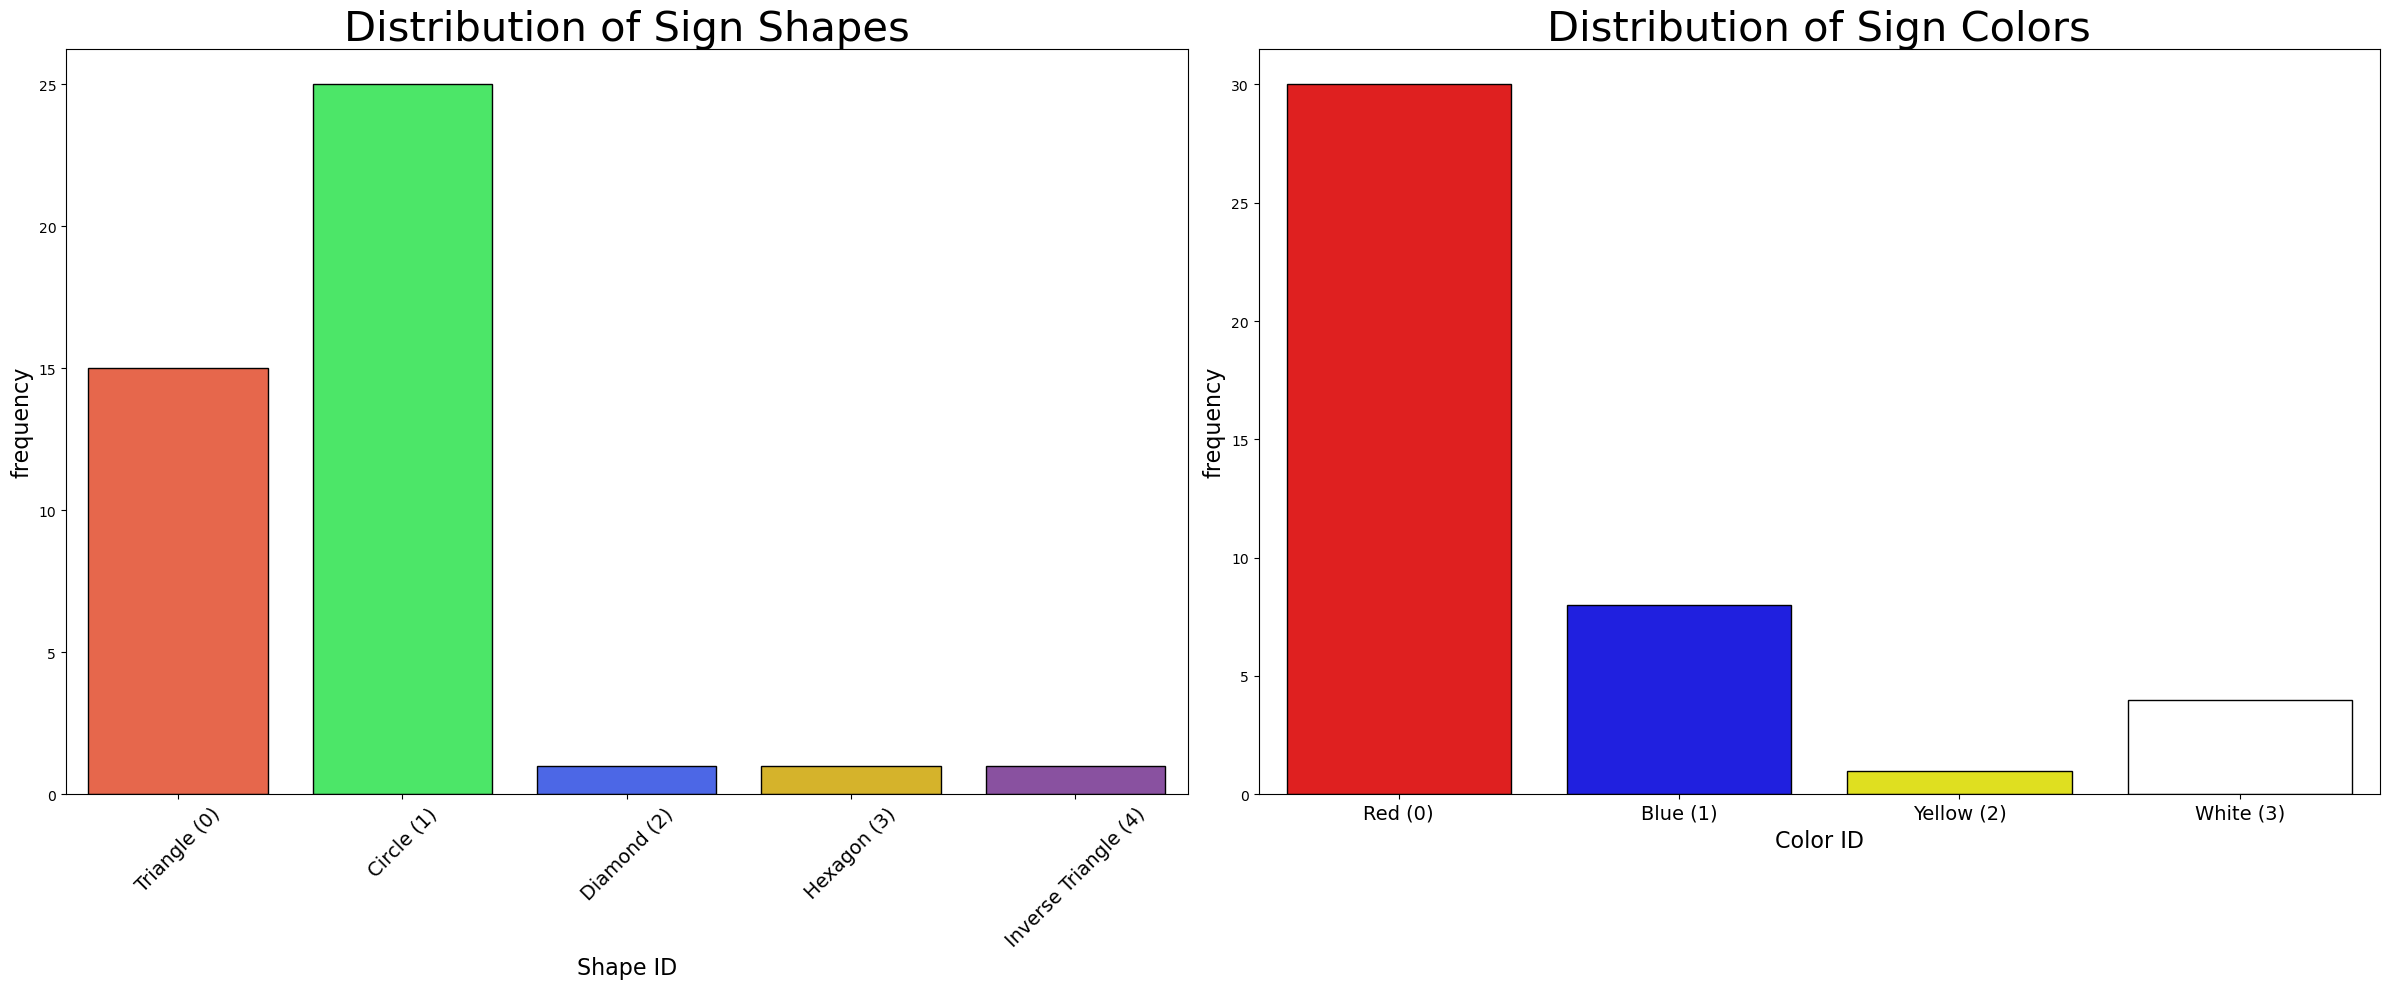

In [31]:
plt.figure(figsize=(24, 10))

# First subplot for ShapeId distribution
plt.subplot(1, 2, 1)
sns.countplot(data=meta_data, x='ShapeId', palette=['#FF5733', '#33FF57', '#3357FF', '#F1C40F', '#8E44AD'], edgecolor='black')  # Added edgecolor='black'
plt.title('Distribution of Sign Shapes', fontsize=30)
plt.xlabel('Shape ID', fontsize=16)
plt.ylabel('frequency', fontsize=16)

# Setting custom labels for ShapeId with 45 degrees rotation
shape_labels = ['Triangle (0)', 'Circle (1)', 'Diamond (2)', 'Hexagon (3)', 'Inverse Triangle (4)']
plt.xticks(ticks=range(len(shape_labels)), labels=shape_labels, rotation=45, fontsize=14)  # Replacing x-axis values with labels and rotating

# Second subplot for ColorId distribution
plt.subplot(1, 2, 2)
sns.countplot(data=meta_data, x='ColorId', palette=['#FF0000', '#0000FF', '#FFFF00', '#FFFFFF'], edgecolor='black')  # Added edgecolor='black'
plt.title('Distribution of Sign Colors', fontsize=30)
plt.xlabel('Color ID', fontsize=16)
plt.ylabel('frequency', fontsize=16)

# Setting custom labels for ColorId
color_labels = ['Red (0)', 'Blue (1)', 'Yellow (2)', 'White (3)']
plt.xticks(ticks=range(len(color_labels)), labels=color_labels, fontsize=14)  # Replacing x-axis values with labels

plt.tight_layout()
plt.show()

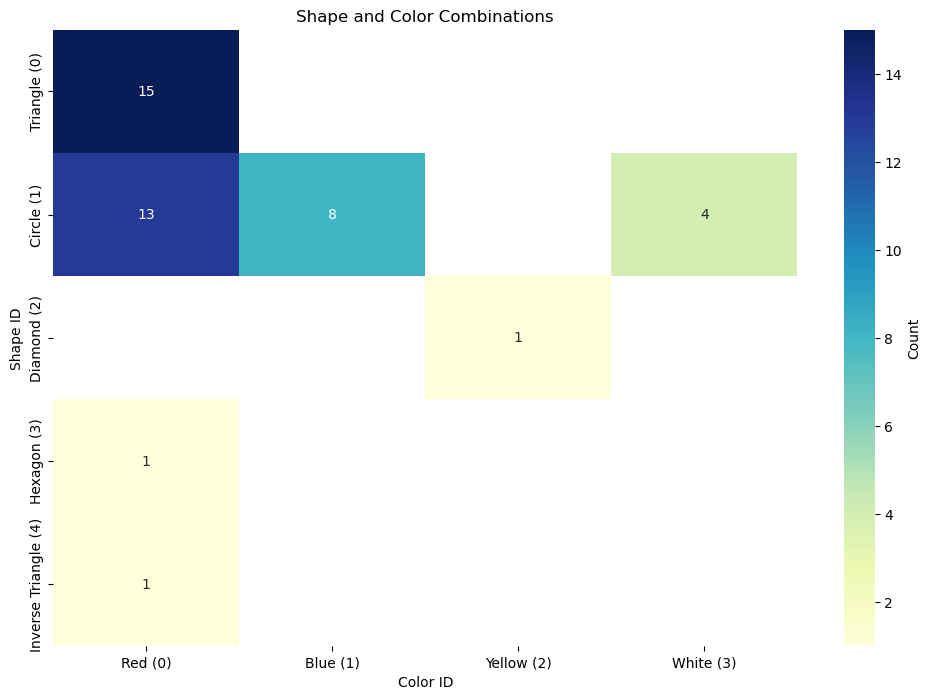

In [32]:
# Analyze shape and color combinations
shape_color_counts = meta_data.groupby(['ShapeId', 'ColorId']).size().unstack()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(shape_color_counts, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Count'})  # Using fmt='g' for general formatting

# Setting custom labels for ColorId and ShapeId
color_labels = ['Red (0)', 'Blue (1)', 'Yellow (2)', 'White (3)']  # ColorId labels
shape_labels = ['Triangle (0)', 'Circle (1)', 'Diamond (2)', 'Hexagon (3)', 'Inverse Triangle (4)']  # ShapeId labels

plt.title('Shape and Color Combinations')
plt.xlabel('Color ID')
plt.ylabel('Shape ID')

# Update x-ticks and y-ticks with descriptive labels in the middle of the boxes
heatmap.set_xticks(np.arange(len(color_labels)) + 0.5)  # Shift x-ticks to the center
heatmap.set_yticks(np.arange(len(shape_labels)) + 0.5)  # Shift y-ticks to the center
heatmap.set_xticklabels(color_labels)  # Update ColorId labels
heatmap.set_yticklabels(shape_labels)  # Update ShapeId labels

plt.show()

## 3.4 Correlation Analysis
### Let's examine correlations between different features:

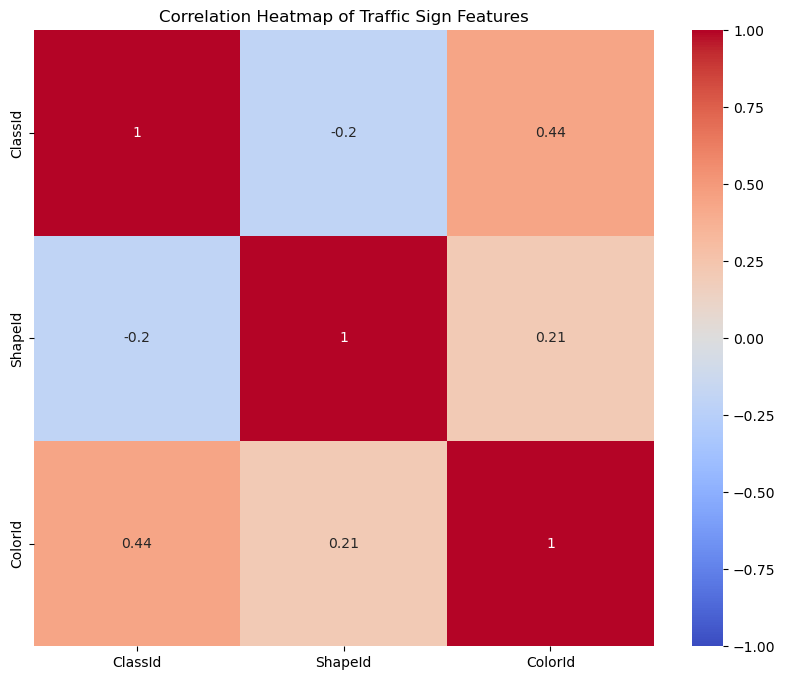

In [34]:
# Combine relevant columns from meta_data and sign_names
correlation_data = meta_data.merge(sign_names, on='ClassId')

# Select numerical columns for correlation analysis
numerical_columns = ['ClassId', 'ShapeId', 'ColorId']

# Calculate correlation matrix
correlation_matrix = correlation_data[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Traffic Sign Features')
plt.show()

## 3.5 Exploring the Image Classes

In this section, we will delve into understanding the 43 distinct classes that our images fall into. These classes represent different types of traffic signs, and each class is denoted by a unique class ID. Gaining a clear understanding of these categories will assist us in later stages of model training and prediction.

### Exploring the Meta Image Classes

In [36]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import cv2

# Paths
data_dir = 'data'
meta_dir = os.path.join(data_dir, 'Meta')
train_dir = os.path.join(data_dir, 'Train')

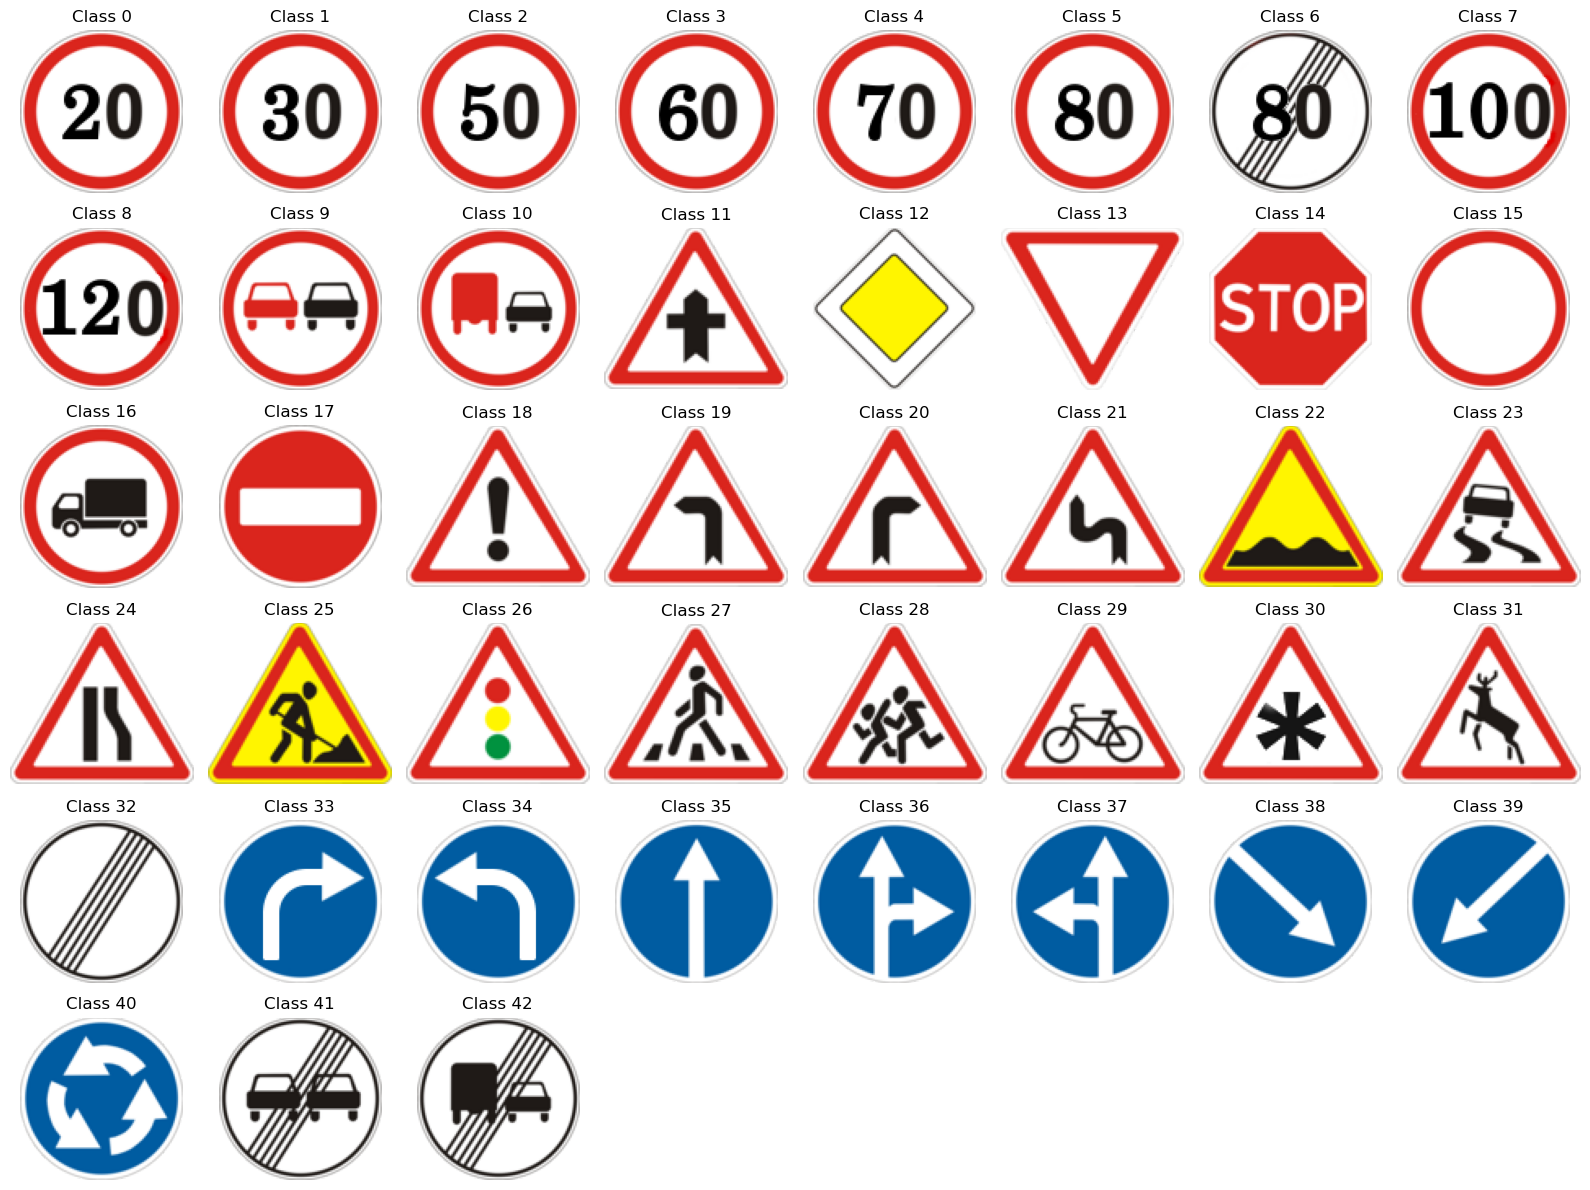

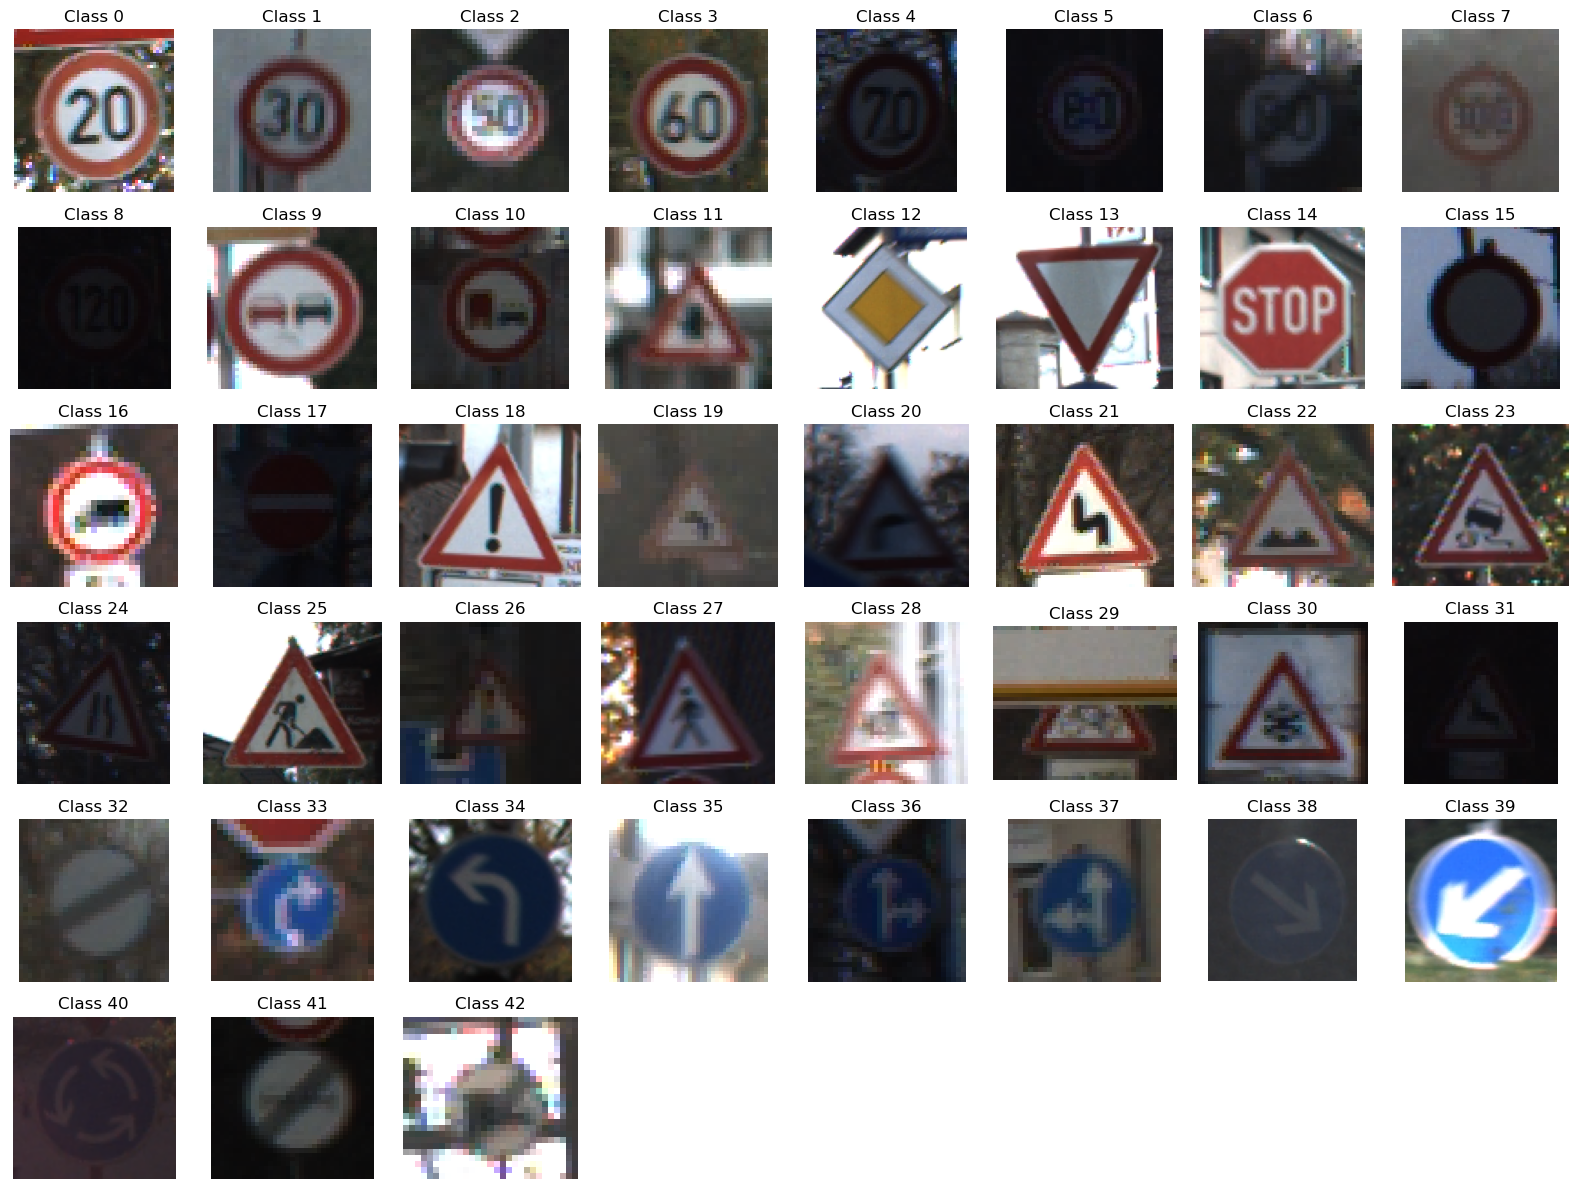

CPU times: total: 6.06 s
Wall time: 8.44 s


In [37]:
%%time
## 3.5 Exploring Image Classes

def show_images(image_paths, titles, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    for i, ax in enumerate(axes.flat):
        if i < len(image_paths):
            img = Image.open(image_paths[i])
            ax.imshow(img)
            ax.set_title(titles[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize Meta images
meta_images = [os.path.join(meta_dir, f"{i}.png") for i in range(43)]
meta_titles = [f"Class {i}" for i in range(43)]
show_images(meta_images, meta_titles, 6, 8)

# Visualize random samples from Train folder
train_samples = []
train_titles = []
for class_id in range(43):
    class_dir = os.path.join(train_dir, str(class_id))
    images = os.listdir(class_dir)
    if images:
        sample = random.choice(images)
        train_samples.append(os.path.join(class_dir, sample))
        train_titles.append(f"Class {class_id}")

show_images(train_samples, train_titles, 6, 8)

## 4. Preprocessing and Data Augmentation

In [39]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2, EfficientNetV2S
from sklearn.model_selection import train_test_split

In [40]:
## 4. Preprocessing and Data Augmentation

def preprocess_image(img, target_size=(32, 32)):
    img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, target_size)
    img = img / 255.0
    return img

def load_and_preprocess_data(directory, target_size=(32, 32)):
    images = []
    labels = []
    for class_id in range(43):
        class_dir = os.path.join(directory, str(class_id))
        for image_name in os.listdir(class_dir):
            img = Image.open(os.path.join(class_dir, image_name)).convert('RGB')
            img = preprocess_image(img, target_size)
            images.append(img)
            labels.append(class_id)
    return np.array(images), np.array(labels)

In [41]:
%%time
X, y = load_and_preprocess_data(train_dir)
X = X.reshape(X.shape + (1,))  # Add channel dimension

CPU times: total: 24.7 s
Wall time: 34.7 s


In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1
)

In [43]:
# Visualize preprocessed and augmented images
def show_preprocessed_and_augmented(X, y, n=5):
    fig, axes = plt.subplots(2, n, figsize=(n*3, 6))
    for i in range(n):
        # Original image
        axes[0, i].imshow(X[i].squeeze(), cmap='gray')
        axes[0, i].set_title(f"Preprocessed\nClass: {y[i]}")
        axes[0, i].axis('off')
        
        # Augmented image
        aug_img = datagen.random_transform(X[i])
        axes[1, i].imshow(aug_img.squeeze(), cmap='gray')
        axes[1, i].set_title(f"Augmented\nClass: {y[i]}")
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

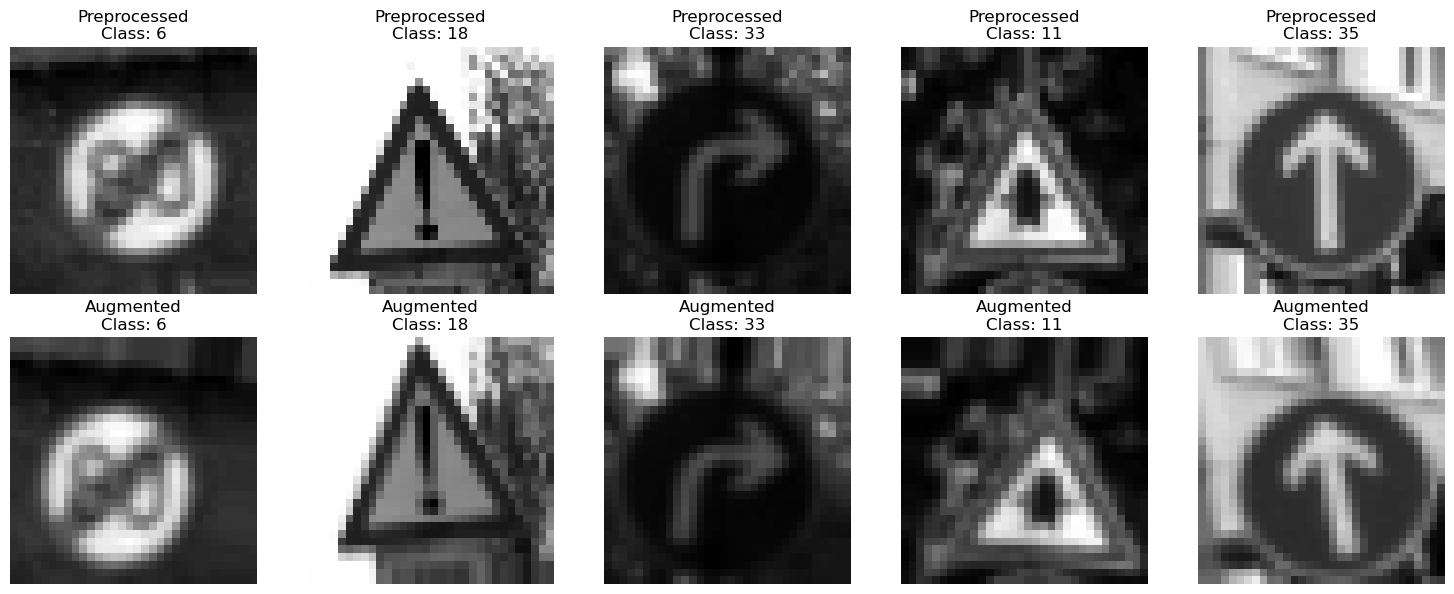

Preprocessing and data augmentation complete.
Training set shape: (31367, 32, 32, 1)
Validation set shape: (7842, 32, 32, 1)


In [44]:
# Randomly select 5 images to visualize
indices = np.random.randint(0, len(X_train), 5)
show_preprocessed_and_augmented(X_train[indices], y_train[indices])

print("Preprocessing and data augmentation complete.")
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

## 5. Modeling and Modifying LeNet architecture

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

## 5. Model Development (LeNet)

def modified_lenet():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(43, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

## 6. Model Training

In [48]:
model = modified_lenet()

model.summary()

C:\Users\mrsha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,139 (484.92 KB)

 Trainable params: 124,139 (484.92 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) // 32,
                    epochs=50,
                    validation_data=(X_val, y_val))

Epoch 1/50
  1/980 ━━━━━━━━━━━━━━━━━━━━ 1:19:48 5s/step - accuracy: 0.0625 - loss: 3.7581

C:\Users\mrsha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


980/980 ━━━━━━━━━━━━━━━━━━━━ 31s 27ms/step - accuracy: 0.0846 - loss: 3.4441 - val_accuracy: 0.5224 - val_loss: 1.6390
Epoch 2/50
  1/980 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3125 - loss: 2.2203

C:\Users\mrsha\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


980/980 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3125 - loss: 2.2203 - val_accuracy: 0.5161 - val_loss: 1.6206
Epoch 3/50
980/980 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.3940 - loss: 1.9838 - val_accuracy: 0.7124 - val_loss: 1.0069
Epoch 4/50
980/980 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3438 - loss: 2.1617 - val_accuracy: 0.7151 - val_loss: 1.0102
Epoch 5/50
980/980 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.5084 - loss: 1.5225 - val_accuracy: 0.7786 - val_loss: 0.7414
Epoch 6/50
980/980 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6875 - loss: 1.0496 - val_accuracy: 0.7786 - val_loss: 0.7458
Epoch 7/50
980/980 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.5893 - loss: 1.2431 - val_accuracy: 0.8587 - val_loss: 0.4828
Epoch 8/50
980/980 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7188 - loss: 1.0233 - val_accuracy: 0.8592 - val_loss: 0.4861
Epoch 9/50
980/980 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.6482 - loss: 1.0602 - val_accuracy: 0.881

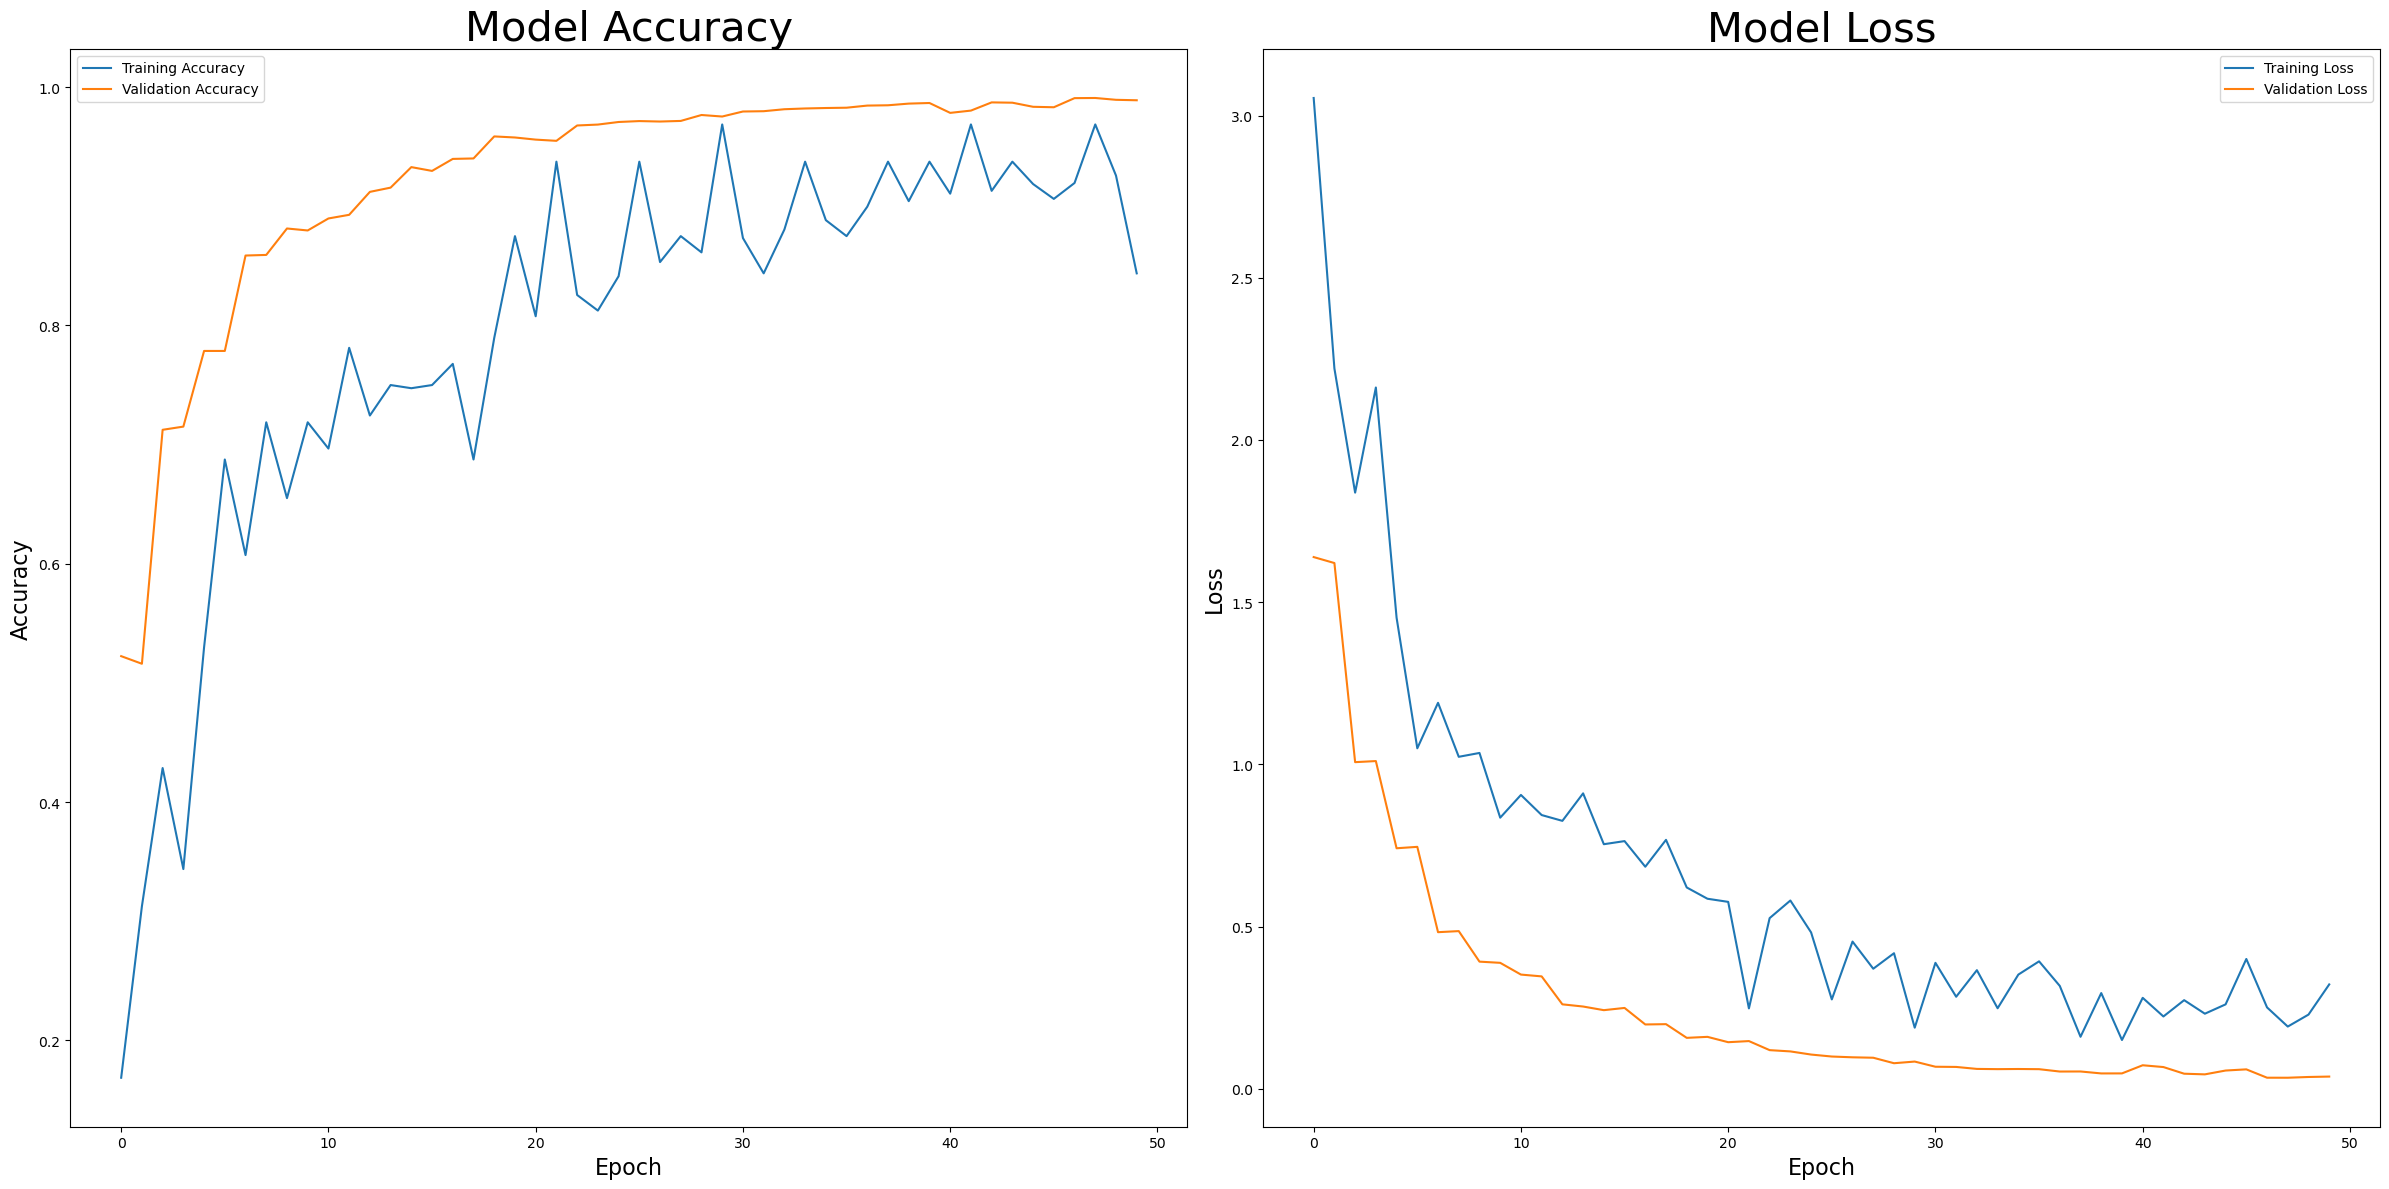

In [50]:
## 7. Visualizing Results

plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=30)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=30)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()



In [51]:
## 8. Model Evaluation
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_accuracy:.4f}")

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9878 - loss: 0.0422
Test accuracy: 0.9890


In [52]:
# Pickle the model
import pickle

with open("traffic_sign_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as 'traffic_sign_model.pkl'")

Model saved as 'traffic_sign_model.pkl'


In [101]:
# Make predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


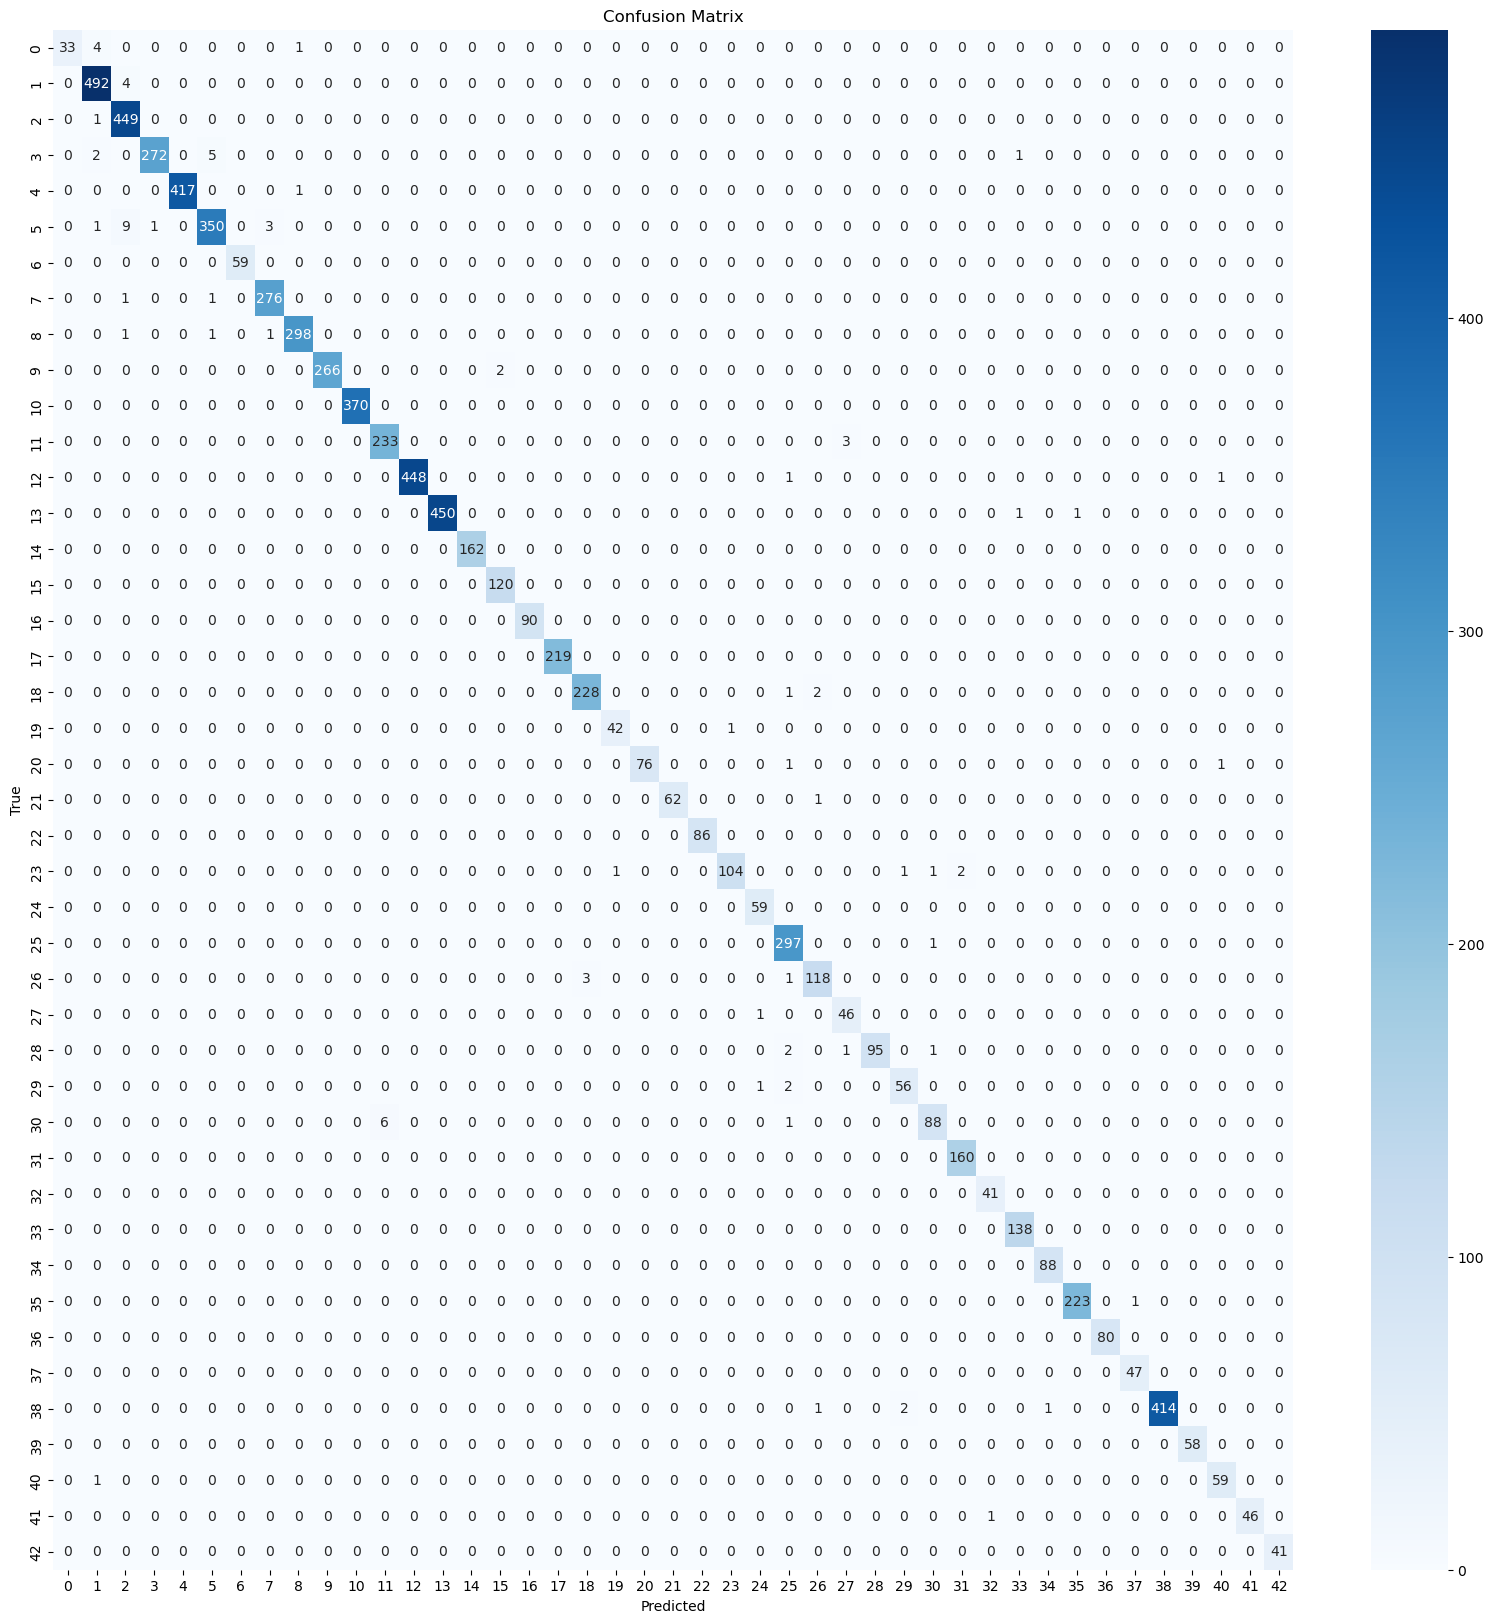

In [103]:
# Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [109]:
# Classification Report
print("Classification Report:")
print(classification_report(y_val, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        38
           1       0.98      0.99      0.99       496
           2       0.97      1.00      0.98       450
           3       1.00      0.97      0.98       280
           4       1.00      1.00      1.00       418
           5       0.98      0.96      0.97       364
           6       1.00      1.00      1.00        59
           7       0.99      0.99      0.99       278
           8       0.99      0.99      0.99       301
           9       1.00      0.99      1.00       268
          10       1.00      1.00      1.00       370
          11       0.97      0.99      0.98       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      1.00      1.00       162
          15       0.98      1.00      0.99       120
          16       1.00      1.00      1.00        90
    

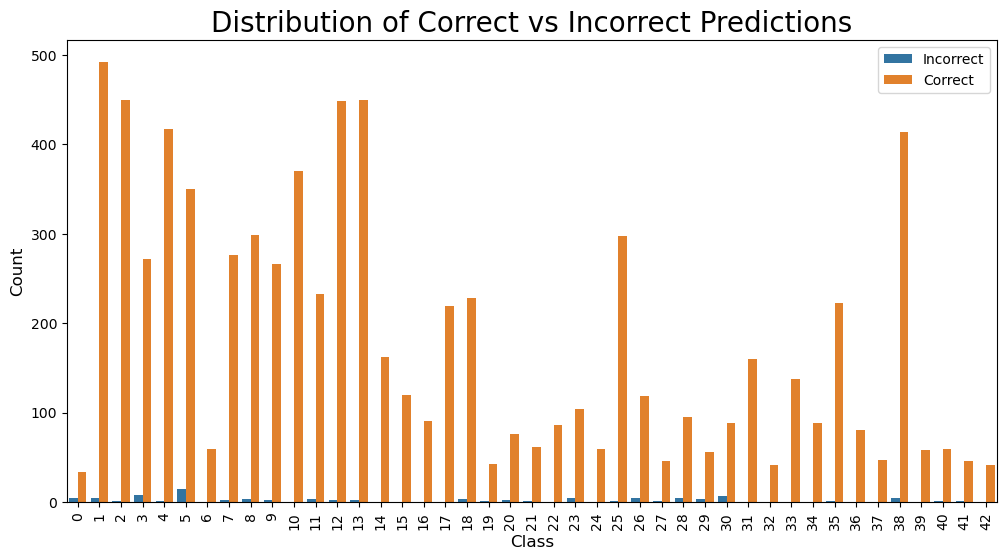

In [133]:
# Distribution of Correct vs Incorrect Predictions
plt.figure(figsize=(12, 6))
sns.countplot(x=y_val, hue=y_val == y_pred_classes)
plt.title('Distribution of Correct vs Incorrect Predictions', fontsize=20)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['Incorrect', 'Correct'])
plt.xticks(rotation=90)
plt.show()

In [113]:
# Function to plot correct and incorrect predictions
def plot_predictions(X, y_true, y_pred, n_samples=25):
    fig, axes = plt.subplots(5, 5, figsize=(15, 15))
    for i, ax in enumerate(axes.flat):
        if i < n_samples:
            ax.imshow(X[i].squeeze(), cmap='gray')
            ax.set_title(f"True: {y_true[i]}\nPred: {y_pred[i]}")
            ax.axis('off')
            if y_true[i] == y_pred[i]:
                ax.set_facecolor('lightgreen')
            else:
                ax.set_facecolor('lightcoral')
    plt.tight_layout()
    plt.show()

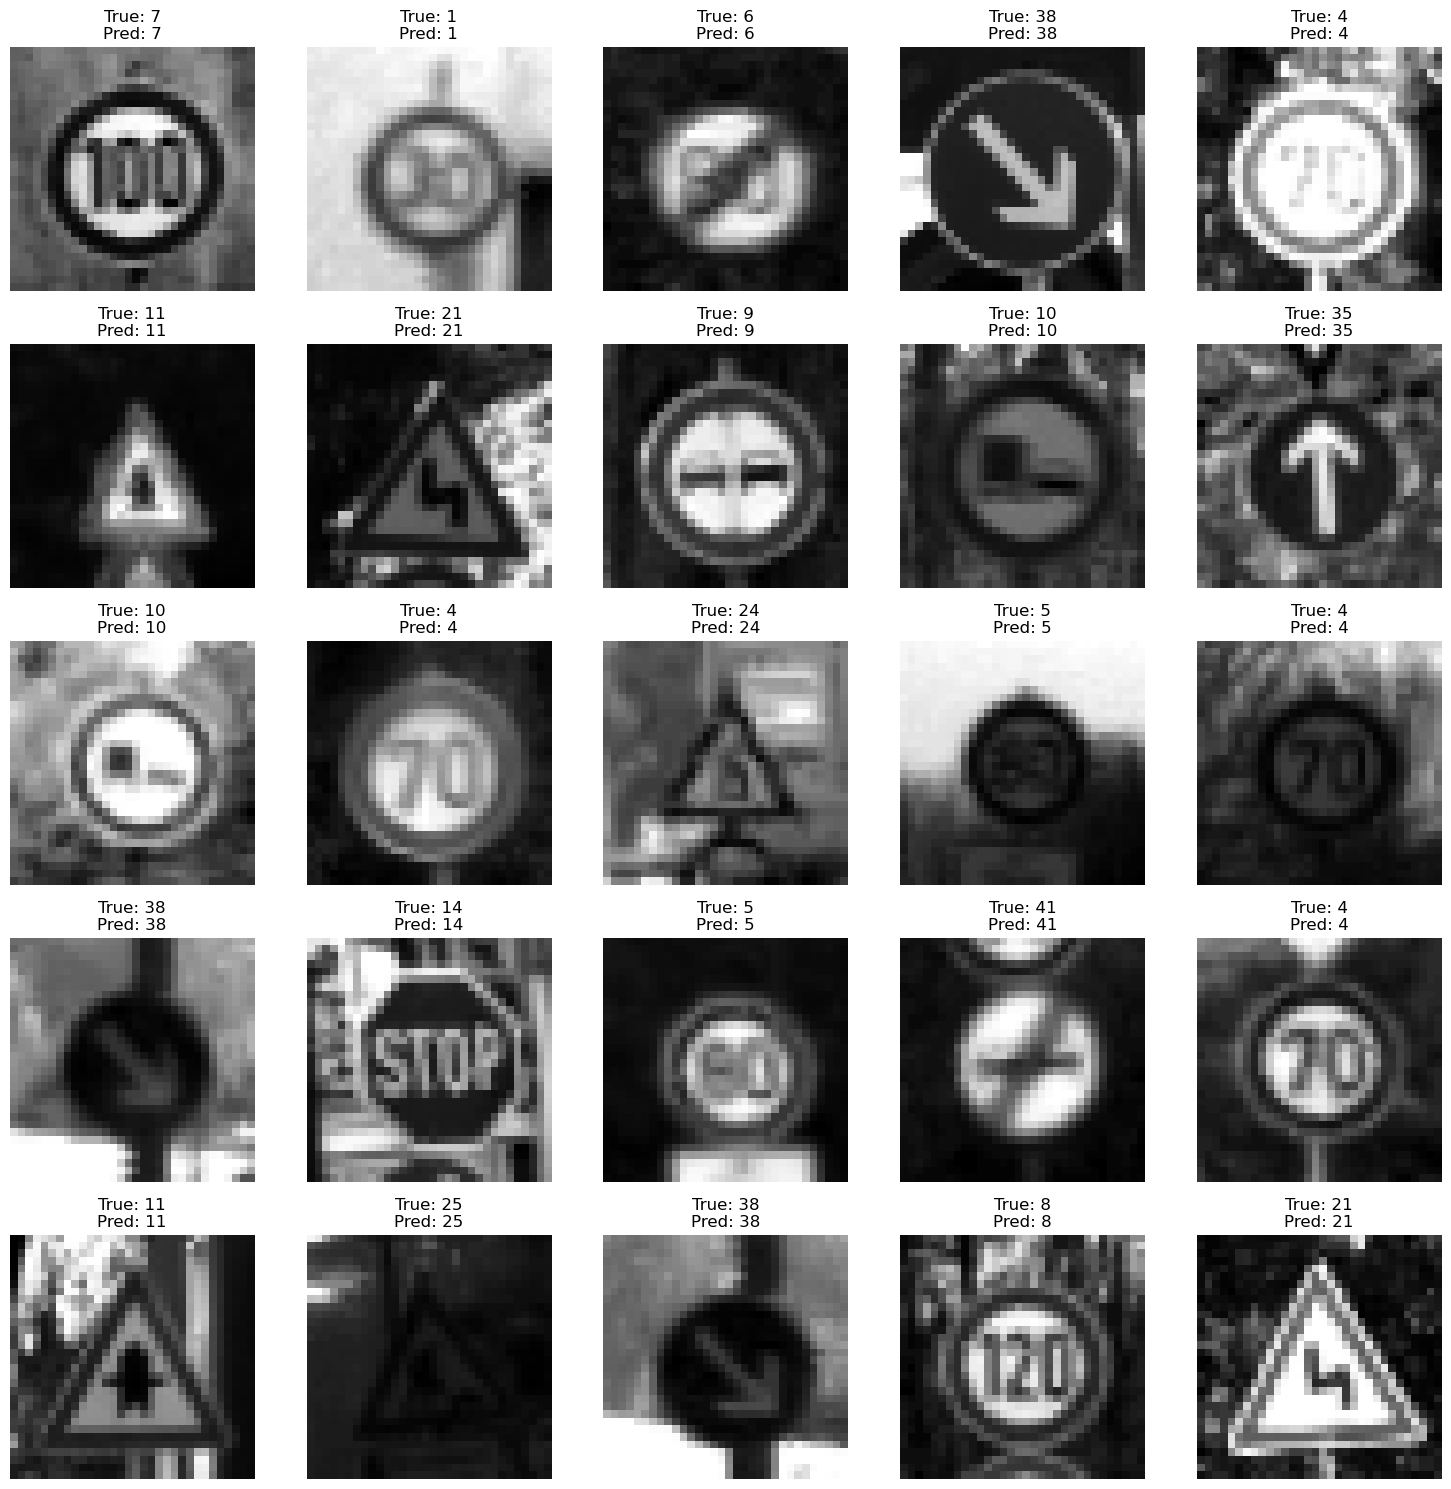

In [115]:
# Plot some predictions
indices = np.random.choice(len(X_val), size=25, replace=False)
plot_predictions(X_val[indices], y_val[indices], y_pred_classes[indices])

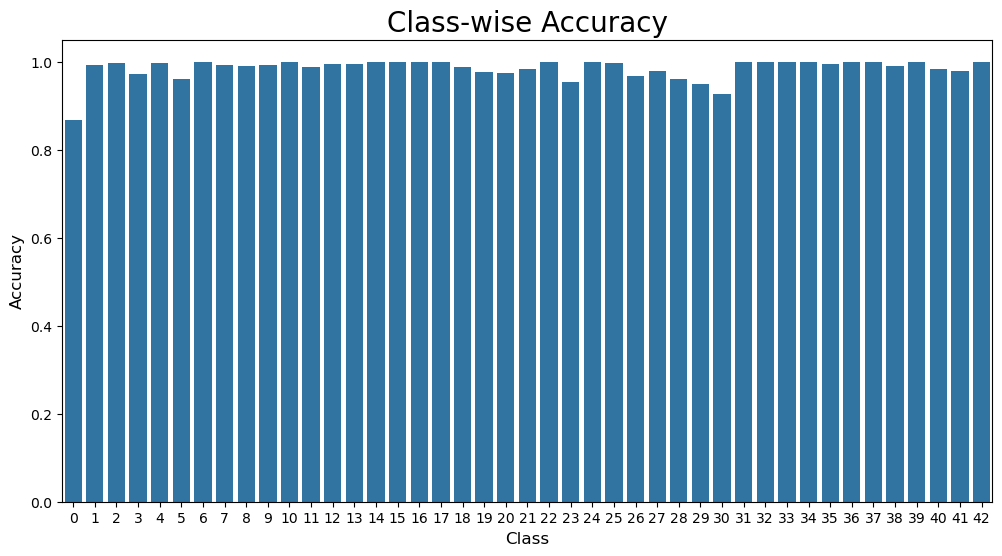

In [135]:
# Class-wise accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(12, 6))
sns.barplot(x=range(43), y=class_accuracy)
plt.title('Class-wise Accuracy', fontsize=20)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

Precise model even with depleted classes like 0, 23, 30, still above 80 percent mark. Averaging out to .988 overall accuracy!

We can create practical applications with this pickled model and have fun with the data through interactive experience
